# Universidad del Valle de Guatemala
## Facultad de Ingeniería
### Departamento de Computación

---

# Laboratorio 2: Series de Tiempo

**Integrantes:**
- Diego Alexander Hernández Silvestre, 21270
- Linda Inés Jiménez Vides, 21169

**Curso:** Data Science  
**Sección:** 10  

---

Guatemala, 1 de agosto de 2024


<div style="text-align: center;">
    <h1>✍️ Discusión / Cálculos - [Series de Tiempo] ✍️</h1>
</div>


En primera instancia, se importan las librerías requeridas para poder realizar los cálculos durante el laboratorio.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import statsmodels.api as sm
import matplotlib.pyplot as plt
from autoviz.AutoViz_Class import AutoViz_Class
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from prophet import Prophet
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
%matplotlib inline

# 📚Dataset: CONSUMO-2024-05.xlsx  

Las columnas que contienen la información sobre el diésel, se encuentran separadas en dos variables *Diesel alto azufre* y *Diesel bajo azufre* por lo que se implementa una función para llevar a cambo la combinación                          en una resultante. 

In [47]:
def combineDieselColumns(csvPath):
    print("📂 Iniciando la combinación de las columnas de Diesel...")

    try:
        # Leer el archivo CSV en un DataFrame
        df = pd.read_csv(csvPath)
        print(f"✅ Archivo cargado: {csvPath}")
    except Exception as e:
        print(f"❌ Error al cargar {csvPath}: {e}")
        return None
    
    if 'Diesel alto azufre' not in df.columns or 'Diesel bajo azufre' not in df.columns:
        print("❌ Las columnas 'Diesel alto azufre' o 'Diesel bajo azufre' no existen en el archivo CSV.")
        return None

    # Crear la nueva columna 'Diesel'
    df['Diesel'] = df['Diesel alto azufre'].replace(0, pd.NA).combine_first(df['Diesel bajo azufre'].replace(0, pd.NA))
    
    print("🏁 Combinación de columnas completada.")
    return df

csvPath = 'Consumo/CONSUMO-2024-05.csv'
dataConsumo = combineDieselColumns(csvPath)

📂 Iniciando la combinación de las columnas de Diesel...
✅ Archivo cargado: Consumo/CONSUMO-2024-05.csv
🏁 Combinación de columnas completada.


Luego, se realiza un filtrado de las columnas relevantes del dataset.

In [3]:
dataConsumo = dataConsumo[['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel', 'Gas licuado de petróleo']]
dataConsumo['Fecha'] = pd.to_datetime(dataConsumo['Fecha'])
dataConsumo.head()

,Fecha,Gasolina regular,Gasolina superior,Diesel,Gas licuado de petróleo
0,2000-01-01,202645.20,308156.82,634667.06,194410.476190
1,2000-02-01,205530.96,307766.31,642380.66,174710.552381
2,2000-03-01,229499.56,331910.29,699807.25,189234.066667
3,2000-04-01,210680.40,315648.08,586803.98,174330.607143
4,2000-05-01,208164.34,319667.97,656948.2,191745.147619


Este es un método alternativo que se puede utilizar para hacer un EDA automatizado. Sin embargo, en comparativa con otros métodos, se decidió no utilizar pero se dejó a manera de proporcionar un recurso extra. 

In [4]:
#plt.figure(figsize=(12, 8))

#for i, column in enumerate(['Gasolina regular', 'Gasolina superior', 'Diesel', 'Gas licuado de petróleo'], 1):
#    plt.subplot(2, 2, i)
#    sns.histplot(dataConsumo[column], kde=True)
#    plt.title(f'Distribución de {column}')
#    plt.xlabel(column)

#plt.tight_layout()
#plt.show()

Para facilitar el EDA, se utilizó la librería AutoViz para automatizar este proceso. De este se puede destacar que en el dataset de Consumo, todas las variables cuentan con distribuciones asimétricas positivas, por lo que se puede deducir que existe una mayor concentración de valores bajos y algunos valores muy altos. Los graficos de caja y bigotes indican la presencia de valores atipicos en todas las variables y los Q-Q plots muestran que ninguna de las variables cuenta con una distribución normal.



Shape of your Data Set loaded: (293, 5)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    5 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Fecha']
To fix these data quality issues in the dataset, import FixDQ

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Fecha,object,0.000000,100,,,Possible ID column: drop before modeling step.
Gasolina regular,float64,0.000000,NA,160741.900000,894533.140000,No issue
Gasolina superior,float64,0.000000,NA,300242.781667,768102.830000,Column has a high correlation with ['Gasolina regular']. Consider dropping one of them.
Diesel,float64,0.000000,NA,507662.650000,1463008.430000,"Column has a high correlation with ['Gasolina regular', 'Gasolina superior']. Consider dropping one of them."
Gas licuado de petróleo,float64,0.000000,NA,167818.137897,588892.160000,"Column has a high correlation with ['Gasolina regular', 'Gasolina superior', 'Diesel']. Consider dropping one of them."


Number of All Scatter Plots = 10


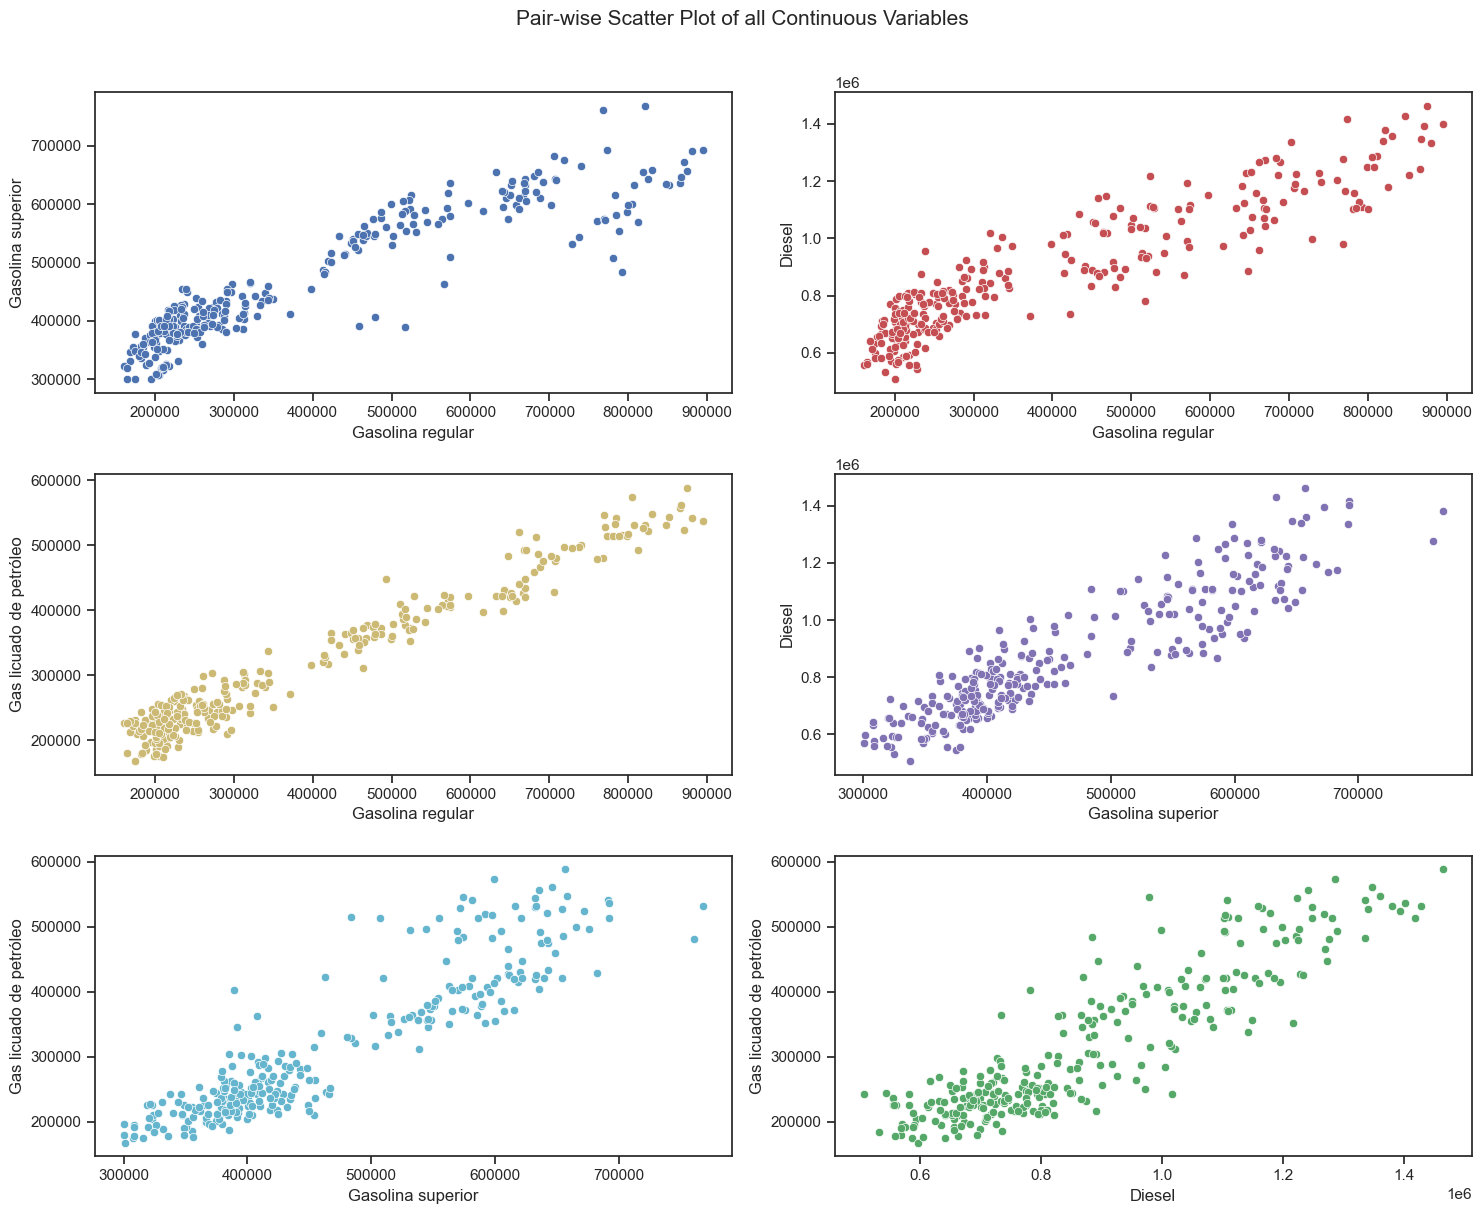

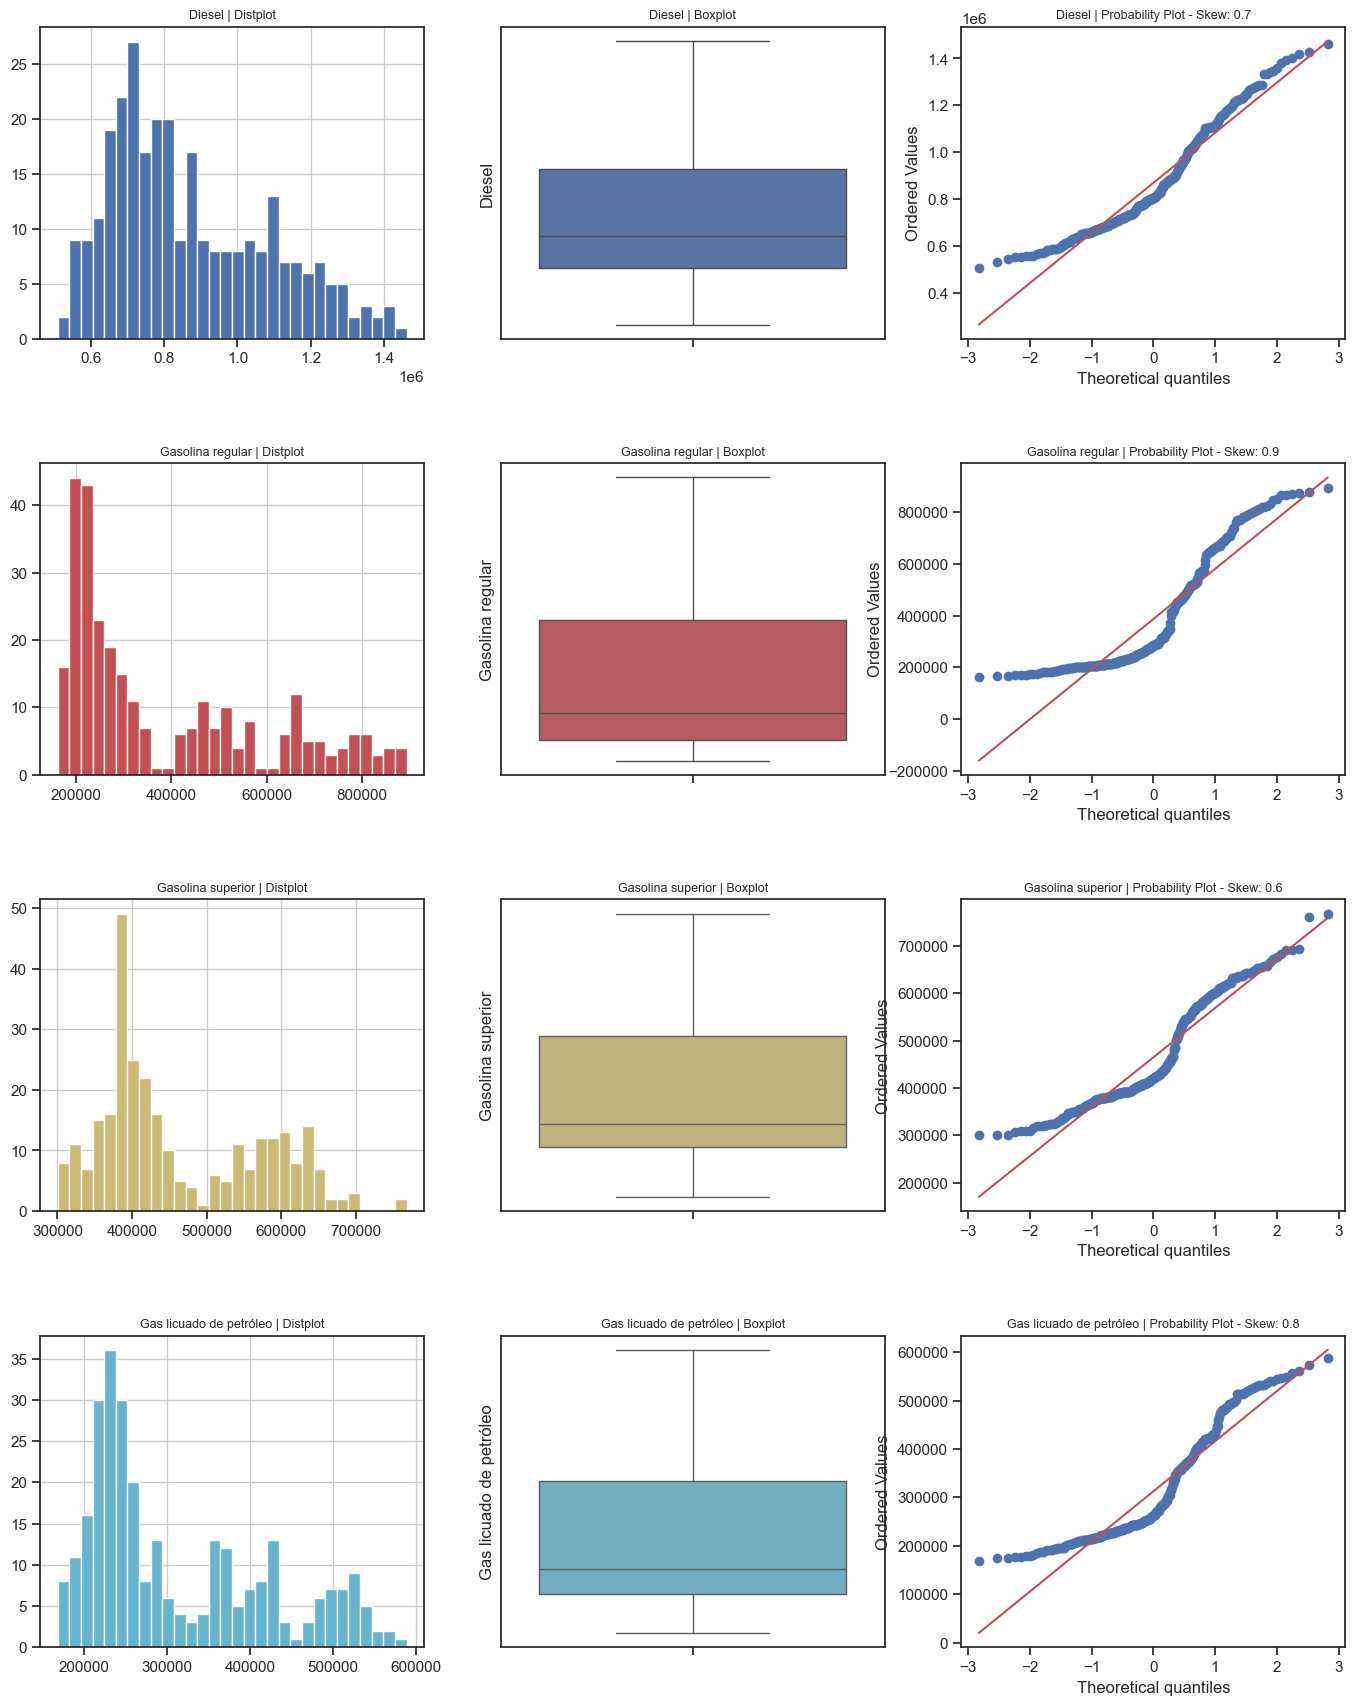

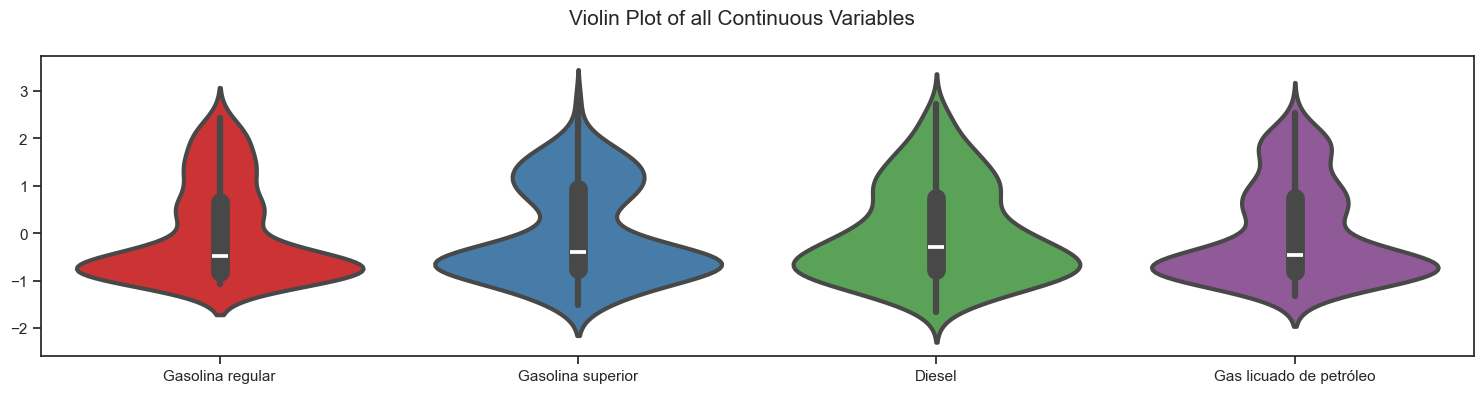

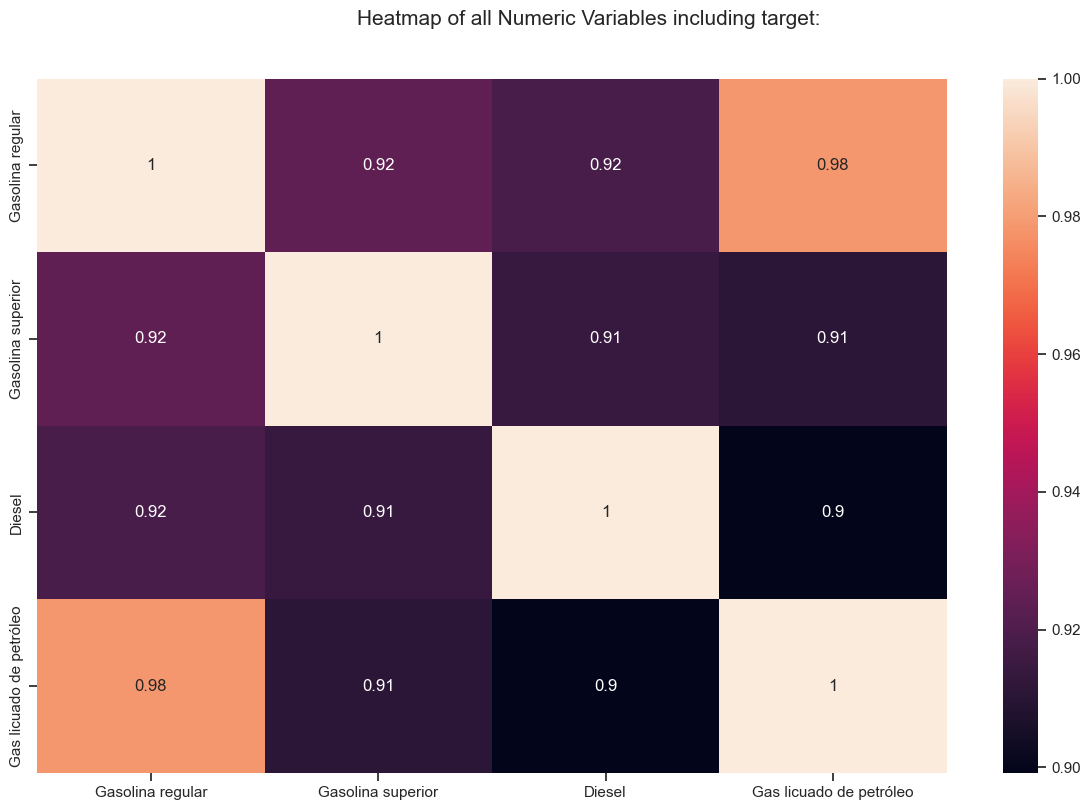

All Plots done
Time to run AutoViz = 1 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,Fecha,Gasolina regular,Gasolina superior,Diesel,Gas licuado de petróleo
0,2000-01-01,202645.200000,308156.820000,6.346671e+05,194410.476190
1,2000-02-01,205530.960000,307766.310000,6.423807e+05,174710.552381
2,2000-03-01,229499.560000,331910.290000,6.998072e+05,189234.066667
3,2000-04-01,210680.400000,315648.080000,5.868040e+05,174330.607143
4,2000-05-01,208164.340000,319667.970000,6.569482e+05,191745.147619
5,2000-06-01,195088.740000,300347.700000,5.709199e+05,196321.933333
6,2000-07-01,204556.770000,308305.930000,5.764360e+05,192344.502381
7,2000-08-01,218388.510000,323011.860000,5.937708e+05,203727.080952
8,2000-09-01,213906.960000,326455.720000,5.901454e+05,194565.097619
9,2000-10-01,213606.650000,323843.630000,6.411134e+05,210261.826190


In [5]:
csvPath = 'Consumo/dataConsumo.csv'
dataConsumo.to_csv(csvPath, index=False)
AV = AutoViz_Class()
AV.AutoViz(csvPath)

In [6]:
#report = sv.analyze(dataConsumo)
#report.show_html('Consumo/EDAConsumo.html') 

# 📚Dataset: IMPORTACION-VOLUMEN-2024-05.xlsx  

Este dataset cuenta con una estructura similar a la de datos de consumo, por lo que tambien se combinan las columnas de diesel. 

In [7]:
csvPath = 'Importacion/IMPORTACION-VOLUMEN-2024-05.csv'

dataImportacion = combineDieselColumns(csvPath)

📂 Iniciando la combinación de las columnas de Diesel...
✅ Archivo cargado: Importacion/IMPORTACION-VOLUMEN-2024-05.csv
🏁 Combinación de columnas completada.


In [8]:
dataImportacion = dataImportacion[['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel', 'Gas licuado de petróleo']]
dataImportacion['Fecha'] = pd.to_datetime(dataImportacion['Fecha'])
dataImportacion.head()

,Fecha,Gasolina regular,Gasolina superior,Diesel,Gas licuado de petróleo
0,2001-01-01,177776.50,373963.96,566101.99,194065.738095
1,2001-02-01,123115.99,243091.07,489525.8,170703.380952
2,2001-03-01,161726.42,312084.38,575559.68,161837.371429
3,2001-04-01,127338.74,285054.89,437745.42,163048.642857
4,2001-05-01,168730.19,300913.67,552609.13,171518.861905


En este EDA se destaca que en el dataset de Importación, similarmente al dataset de Consumo, todas las variables cuentan con distribuciones asimétricas positivas, aunque algunas cuentan con una menor asimetría. Los gráficos de caja y bigotes indican la presencia de valores atipicos principalmente en *Gasolina superior* y *Gas licuado de petróleo*. Al igual que el dataset anterior, los Q-Q plots muestran que ninguna de las variables cuenta con una distribución normal.

Shape of your Data Set loaded: (281, 5)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    5 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Fecha']
To fix these data quality issues in the dataset, import FixDQ

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Fecha,object,0.000000,100,,,Possible ID column: drop before modeling step.
Gasolina regular,float64,0.000000,NA,81015.300000,987872.050000,No issue
Gasolina superior,float64,0.000000,NA,170292.500000,1227173.530000,Column has 2 outliers greater than upper bound (939346.60) or lower than lower bound(23410.12). Cap them or remove them.
Diesel,float64,0.000000,NA,229764.740000,1595698.560000,No issue
Gas licuado de petróleo,float64,0.000000,NA,100561.466667,1077122.750000,Column has 1 outliers greater than upper bound (1076259.26) or lower than lower bound(-285424.28). Cap them or remove them.


Number of All Scatter Plots = 10


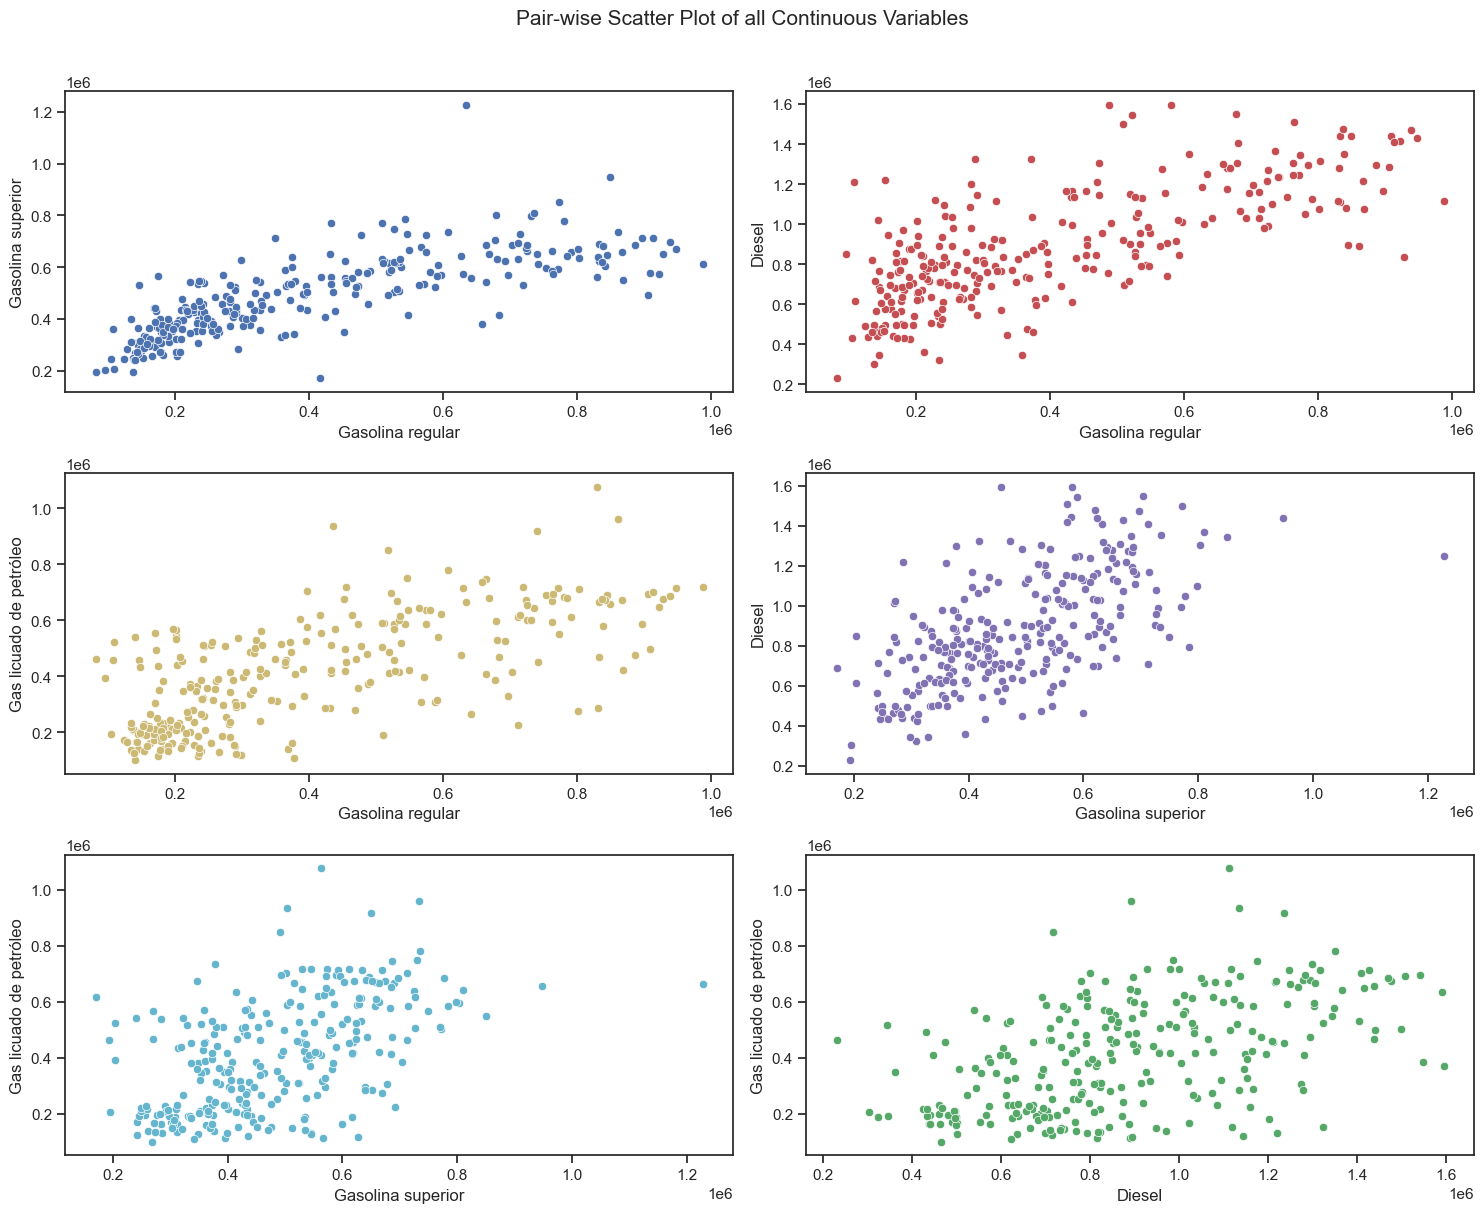

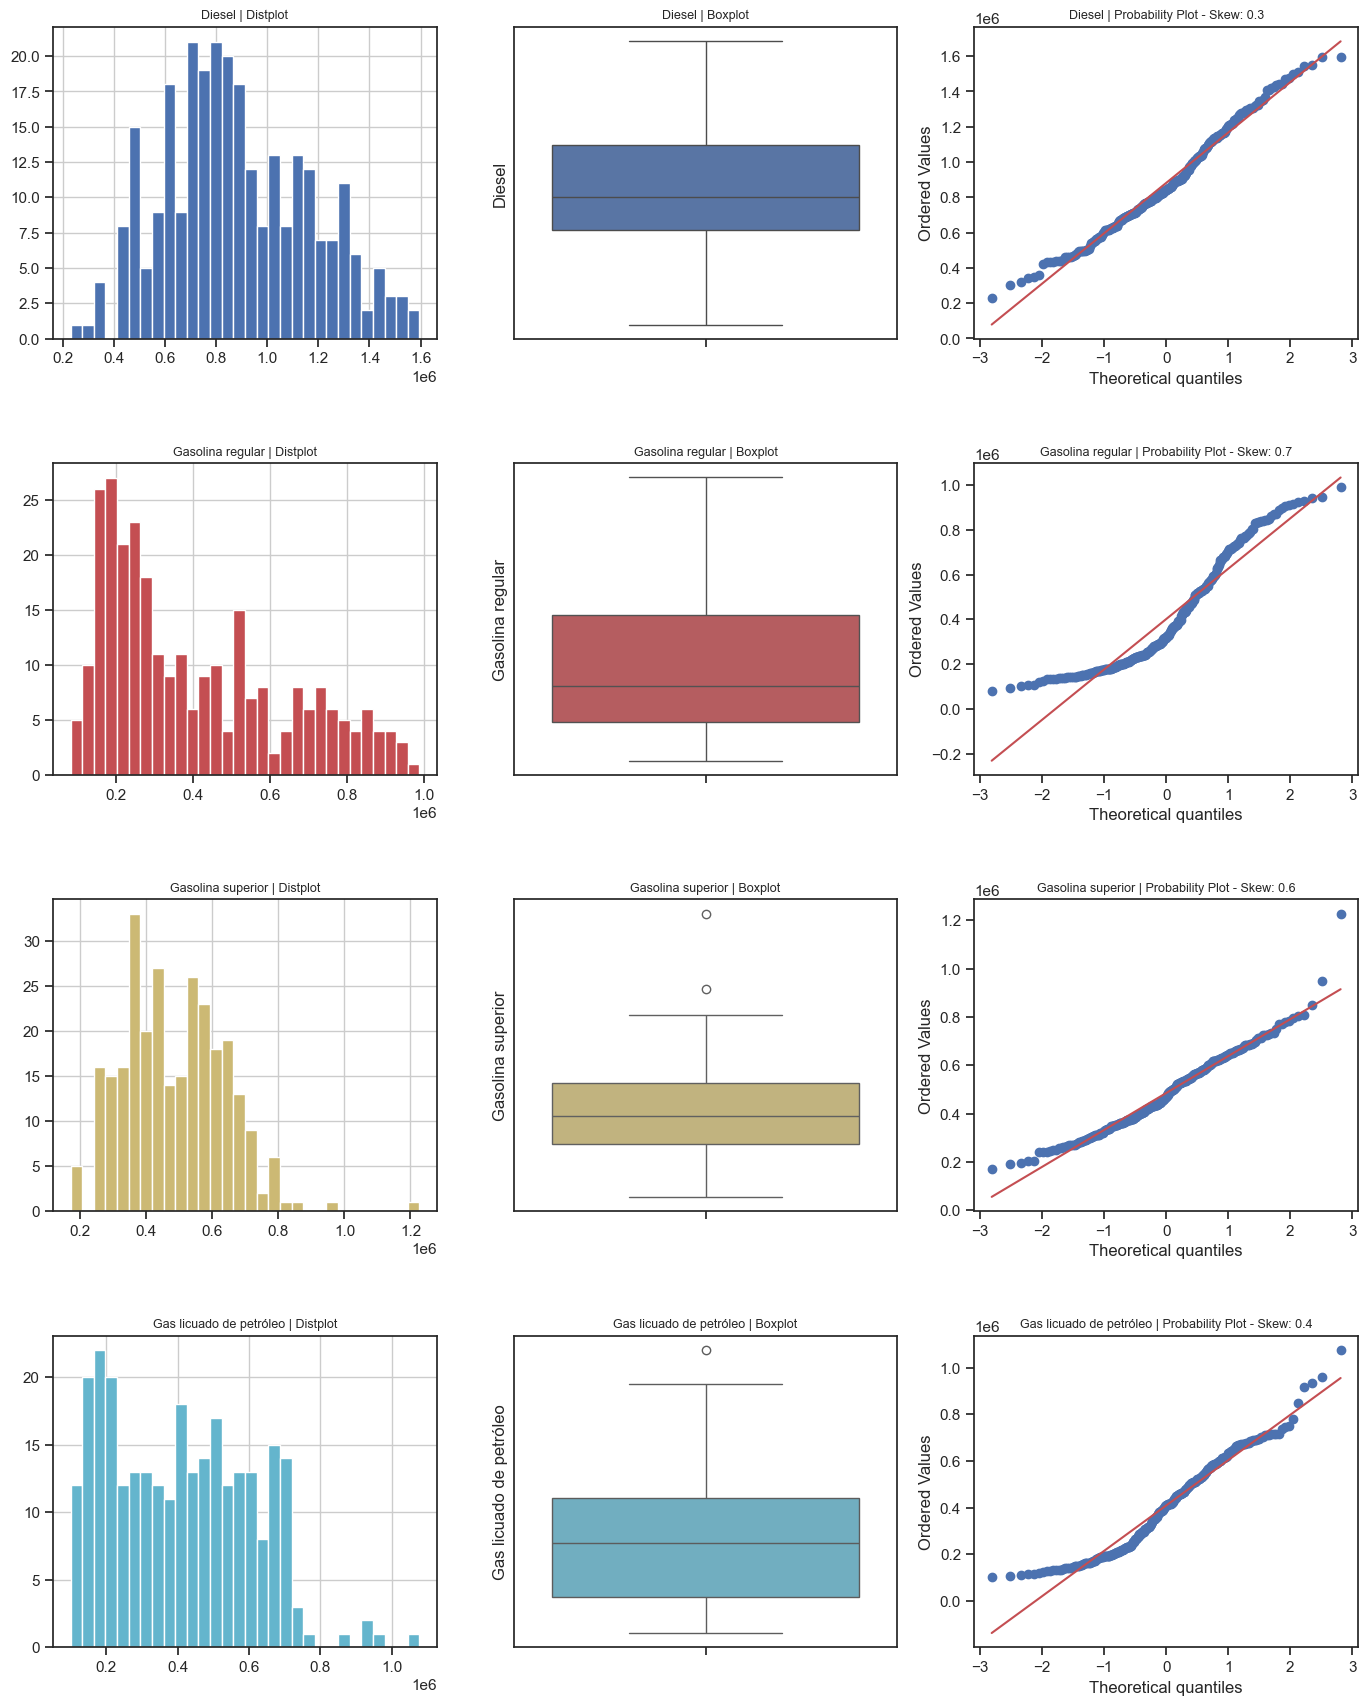

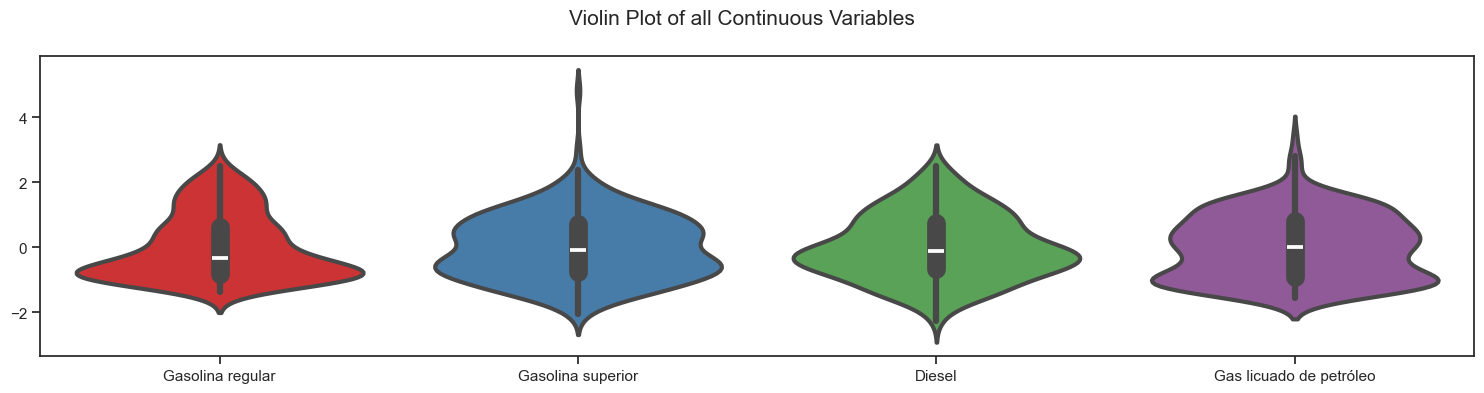

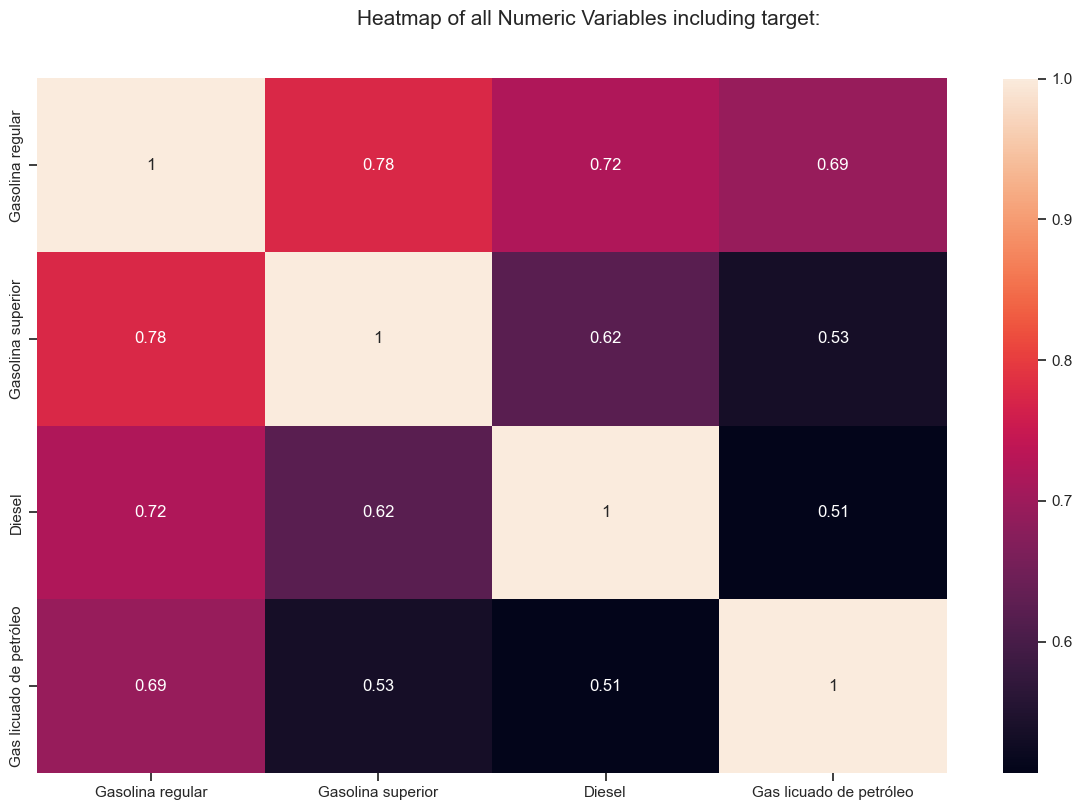

All Plots done
Time to run AutoViz = 1 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,Fecha,Gasolina regular,Gasolina superior,Diesel,Gas licuado de petróleo
0,2001-01-01,177776.500000,373963.960,566101.990,1.940657e+05
1,2001-02-01,123115.990000,243091.070,489525.800,1.707034e+05
2,2001-03-01,161726.420000,312084.380,575559.680,1.618374e+05
3,2001-04-01,127338.740000,285054.890,437745.420,1.630486e+05
4,2001-05-01,168730.190000,300913.670,552609.130,1.715189e+05
5,2001-06-01,152899.090000,333217.190,497855.260,1.900044e+05
6,2001-07-01,136299.130000,195071.860,302350.020,2.060228e+05
7,2001-08-01,139365.070000,268153.260,464159.130,1.005615e+05
8,2001-09-01,233643.750000,308439.070,321952.940,1.868390e+05
9,2001-10-01,141550.220000,305102.280,438989.550,1.638642e+05


In [9]:
csvPath = 'Importacion/dataImportacion.csv'
dataImportacion.to_csv(csvPath, index=False)
AV = AutoViz_Class()
AV.AutoViz(csvPath)

# 📚Dataset: Precios-Promedio-Nacionales-Diarios-2024-3.xlsx

In [10]:
csvPath = 'PreciosPromedioNacionales/PreciosPromedioNacionales.csv'

dataPrecios = pd.read_csv(csvPath)
print(f"✅ Archivo cargado: {csvPath}")

✅ Archivo cargado: PreciosPromedioNacionales/PreciosPromedioNacionales.csv


In [11]:
dataPrecios = dataPrecios[['FECHA', 'Regular GTQ/GALON', 'Superior GTQ/GALON', 'Diesel GTQ/GALON', 'Glp Cilindro 25Lbs. GTQ/LB']]
dataPrecios['FECHA'] = pd.to_datetime(dataPrecios['FECHA'])
dataPrecios.head()

,FECHA,Regular GTQ/GALON,Superior GTQ/GALON,Diesel GTQ/GALON,Glp Cilindro 25Lbs. GTQ/LB
0,2021-01-01,21.11,21.91,17.61,3.96
1,2021-01-02,21.11,21.91,17.61,3.96
2,2021-01-03,21.11,21.91,17.61,3.96
3,2021-01-04,21.11,21.91,17.61,3.96
4,2021-01-05,21.11,21.91,17.61,3.96


En este análisis se puede destacar que la mayoría de categorías de combustibles cuentan con distribuciones cercanas a una distribucion normal, con la excepción de *Gas Cilindro 25Lbs*. Los valores atípicos se aprecian más en esta última que en las otras categorías. *Superior*, *Regular* y *Diesel* tienen rangos intercuartiles similares y más amplios que en comparación de *Gas Cilindro 25Lbs*.

Shape of your Data Set loaded: (1305, 5)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    5 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['FECHA']
To fix these data quality issues in the dataset, import FixD

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
FECHA,object,0.000000,100,,,Possible ID column: drop before modeling step.
Regular GTQ/GALON,float64,0.000000,NA,21.110000,40.500000,No issue
Superior GTQ/GALON,float64,0.000000,NA,21.910000,43.240000,Column has a high correlation with ['Regular GTQ/GALON']. Consider dropping one of them.
Diesel GTQ/GALON,float64,0.000000,NA,17.610000,41.270000,"Column has a high correlation with ['Regular GTQ/GALON', 'Superior GTQ/GALON']. Consider dropping one of them."
Glp Cilindro 25Lbs. GTQ/LB,float64,0.000000,NA,3.960000,5.880000,No issue


Number of All Scatter Plots = 10


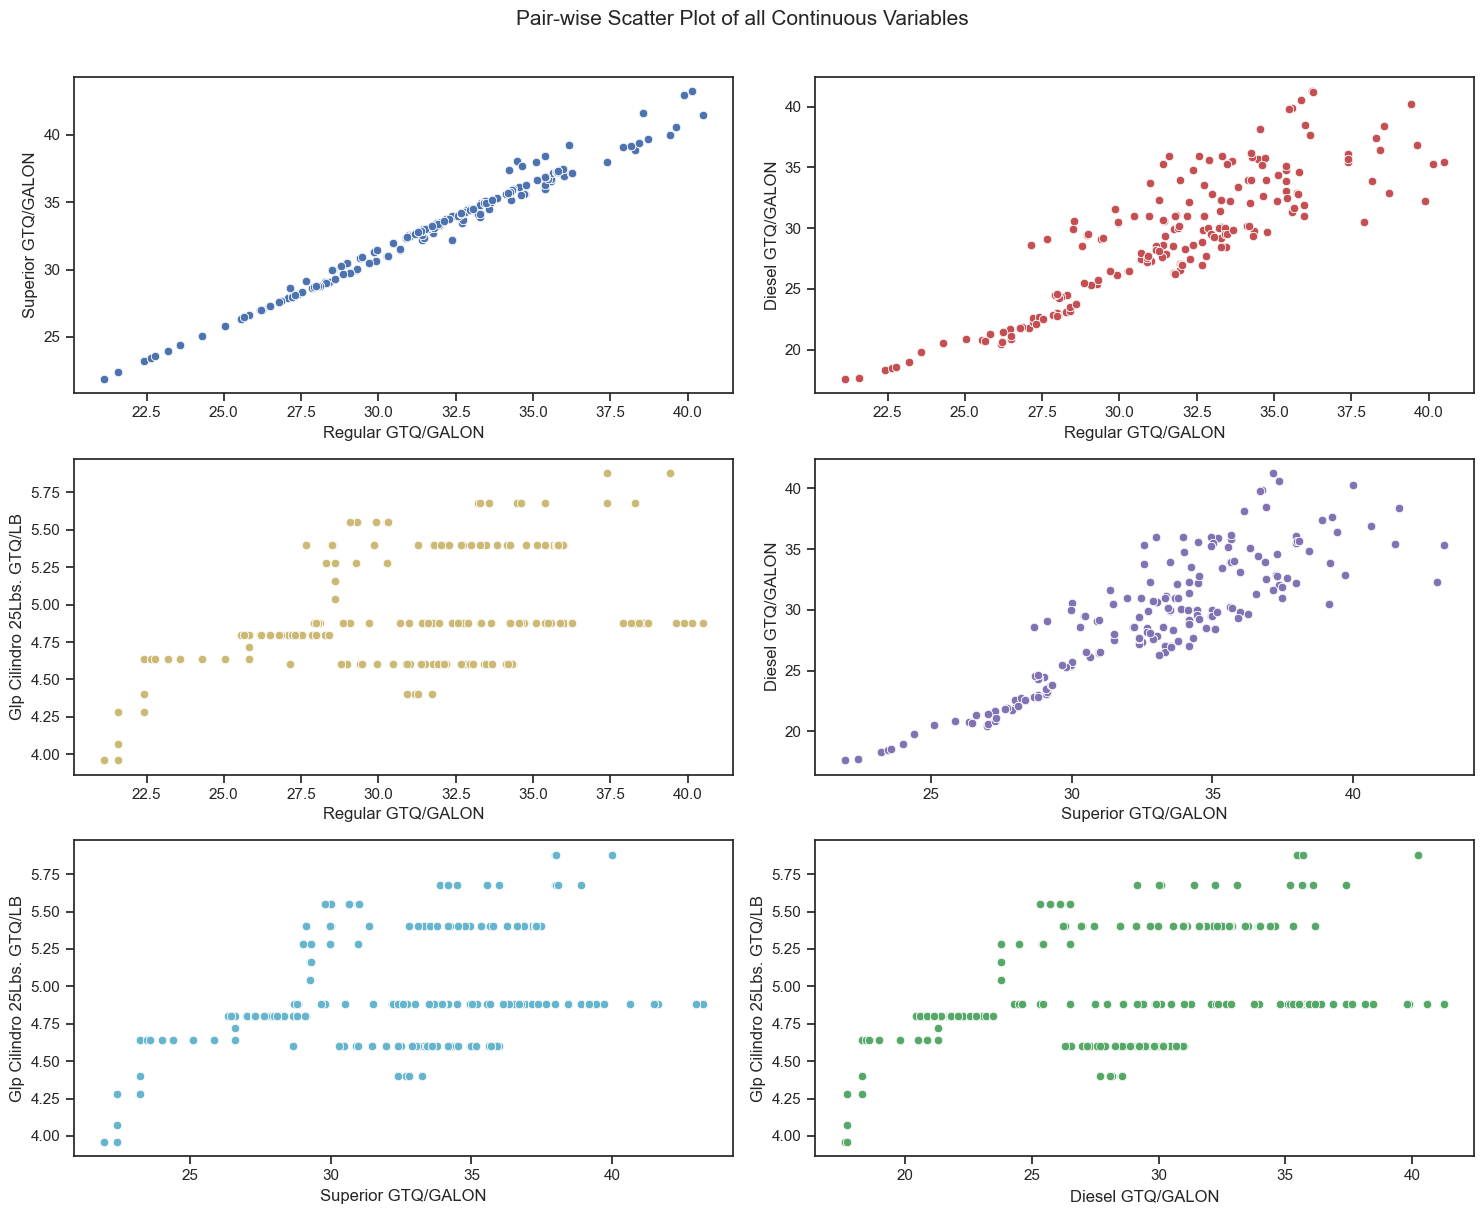

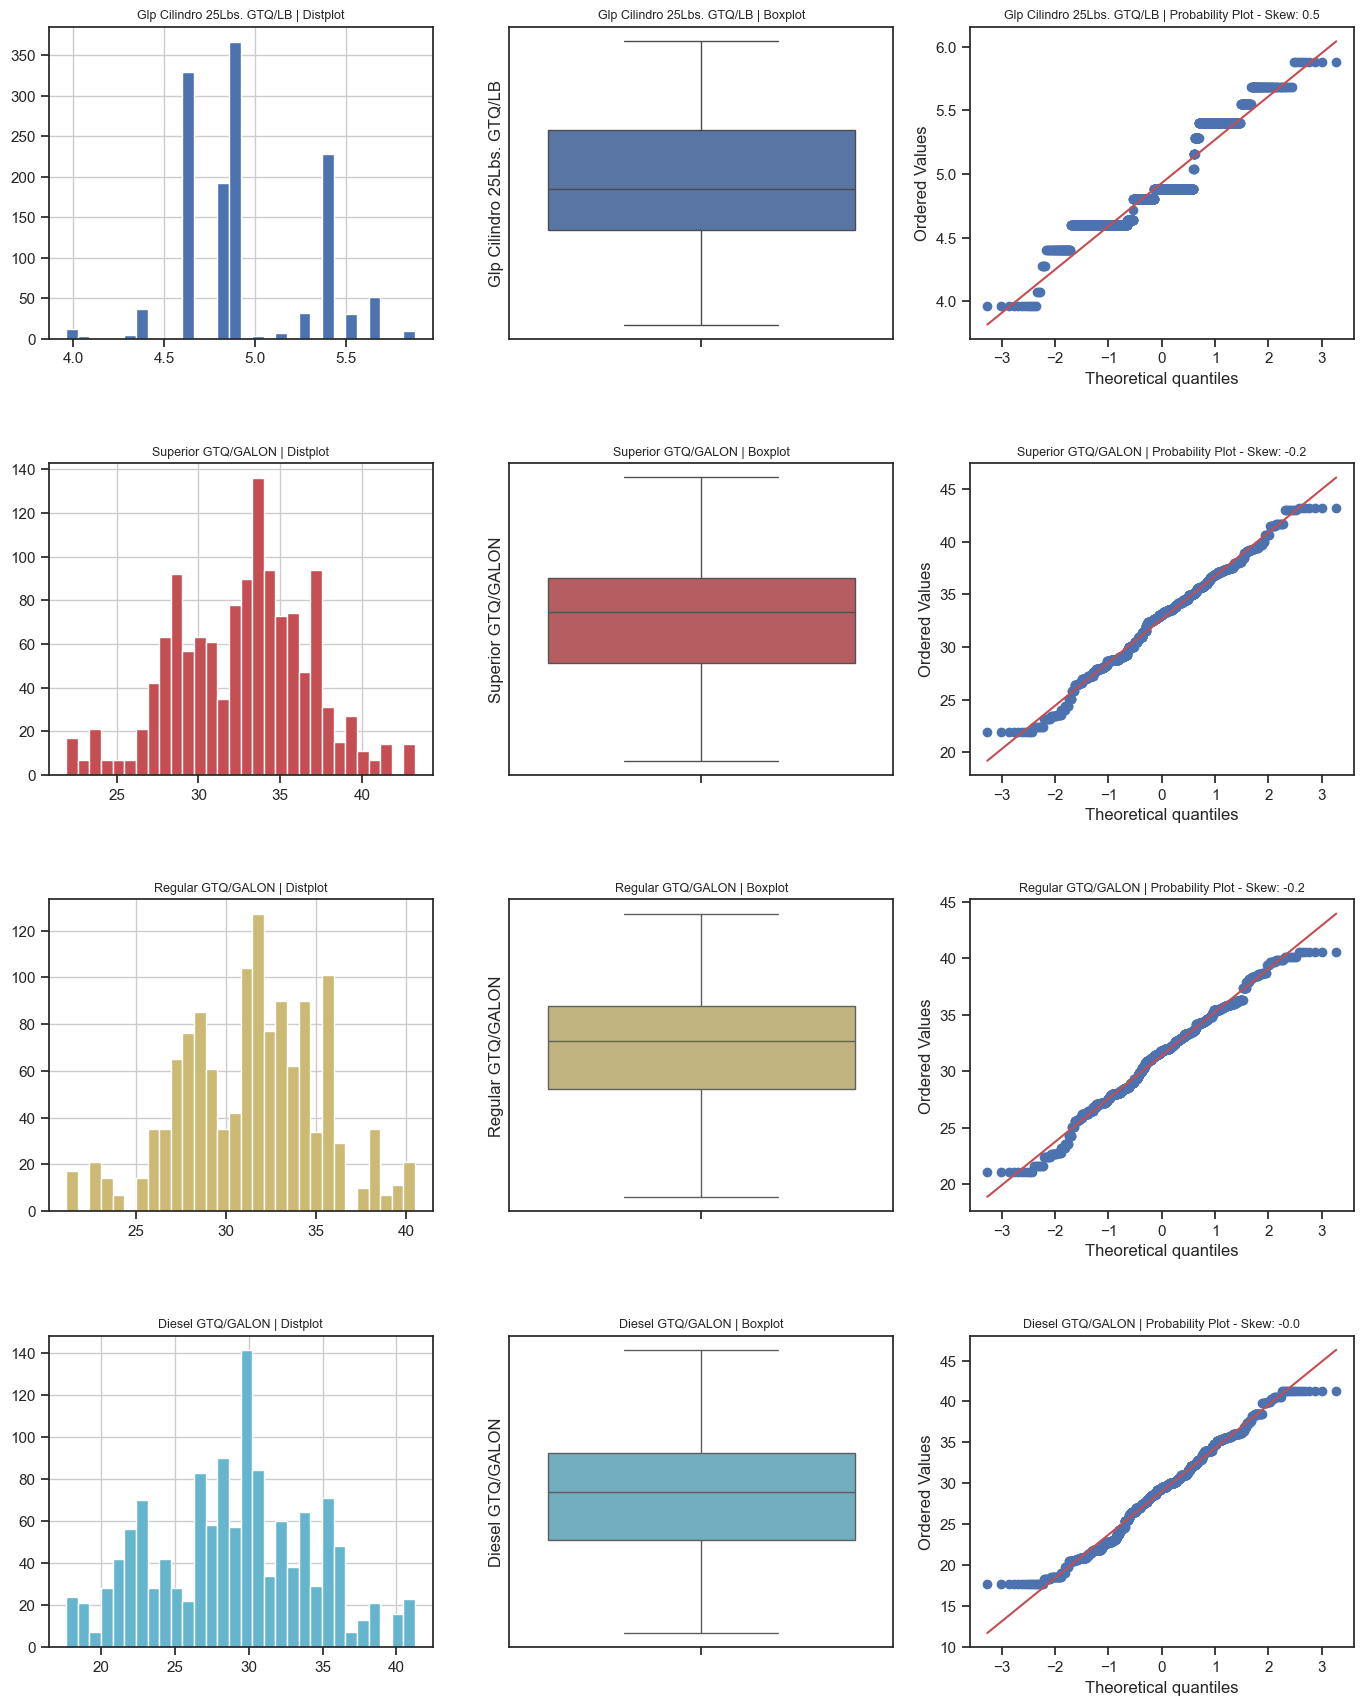

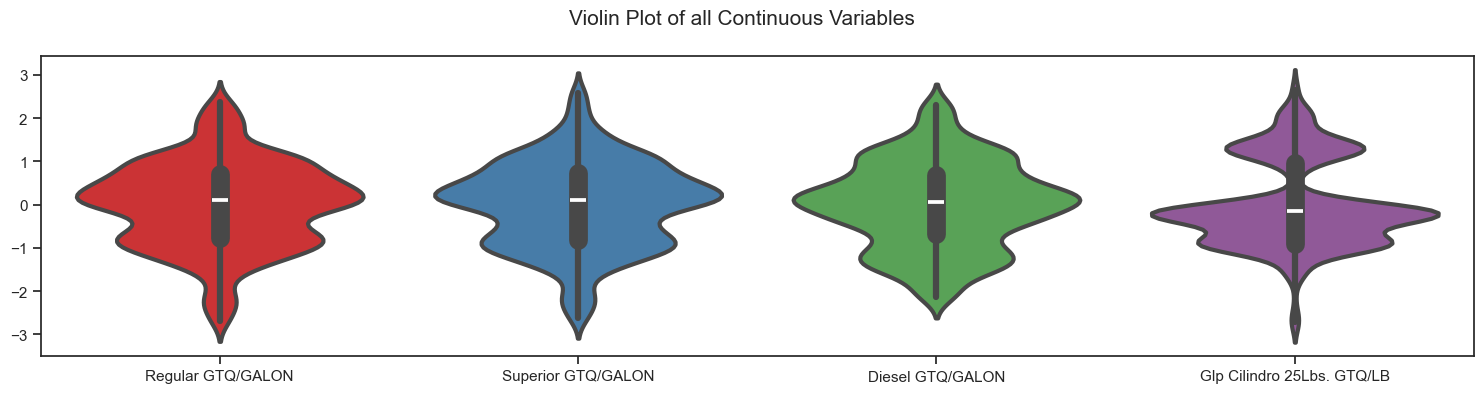

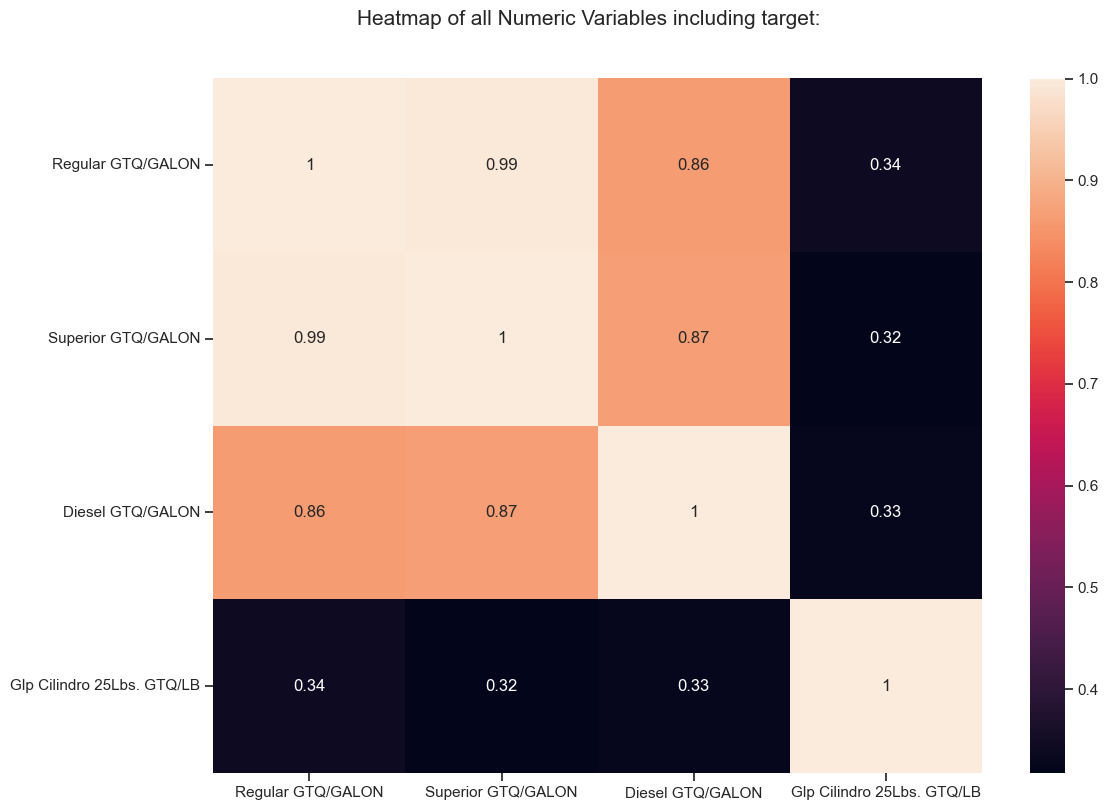

All Plots done
Time to run AutoViz = 1 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,FECHA,Regular GTQ/GALON,Superior GTQ/GALON,Diesel GTQ/GALON,Glp Cilindro 25Lbs. GTQ/LB
0,2021-01-01,21.11,21.91,17.61,3.96
1,2021-01-02,21.11,21.91,17.61,3.96
2,2021-01-03,21.11,21.91,17.61,3.96
3,2021-01-04,21.11,21.91,17.61,3.96
4,2021-01-05,21.11,21.91,17.61,3.96
...,...,...,...,...,...
1300,2024-07-24,31.29,32.79,28.09,4.40
1301,2024-07-25,31.29,32.79,28.09,4.40
1302,2024-07-26,31.29,32.79,28.09,4.40
1303,2024-07-27,31.29,32.79,28.09,4.40


In [12]:
csvPath = 'PreciosPromedioNacionales/dataPrecios.csv'
dataPrecios.to_csv(csvPath, index=False)
AV = AutoViz_Class()
AV.AutoViz(csvPath)

# 📚Datasets: Seleccion de series de tiempo.

Las tres series seleccionadas fueron:

- Dataset consumo = 'Diesel'
- Dataset importación = 'Gasolina regular'
- Dataset precios = 'Superior GTQ/GALON'

In [13]:
serieConsumoDiesel = dataConsumo[['Fecha', 'Diesel']]
serieImportacionRegular = dataImportacion[['Fecha', 'Gasolina regular']]
seriePreciosSuper = dataPrecios[['FECHA', 'Superior GTQ/GALON']]

serieConsumoDiesel.set_index('Fecha', inplace=True)
serieConsumoDiesel.sort_index(inplace=True)
serieImportacionRegular.set_index('Fecha', inplace=True)
serieImportacionRegular.sort_index(inplace=True)
seriePreciosSuper.set_index('FECHA', inplace=True)
seriePreciosSuper.sort_index(inplace=True)

### 📝 Datos iniciales sobre las series.

Como se puede observar, se cuenta con tres series de tiempo. Se describen las fechas de inicio y finalización de cada serie, teniendo un abanico de datos que van desde el año 2000 hasta mayo de 2024. Las siglas de frecuencia representan lo siguiente:

- MS significa "Month Start", lo que indica que los datos para ese dataset son mensuales y se registran al inicio de cada mes. 
- D significa "Daily", lo que indica que los datos se registran diariamente.

In [48]:
def mostrarInfoSeriesTiempo(consumoDiesel, importacionRegular, preciosSuper):
    print("📊 Información de las series de tiempo:")

    print("\n🔵 Consumo Diesel:")
    print(f"   Inicio: {consumoDiesel.index.min()}")
    print(f"   Fin: {consumoDiesel.index.max()}")
    frecuenciaDiesel = consumoDiesel.index.freq or pd.infer_freq(consumoDiesel.index)
    print(f"   Frecuencia: {frecuenciaDiesel}")

    print("\n🟠 Importación Gasolina Regular:")
    print(f"   Inicio: {importacionRegular.index.min()}")
    print(f"   Fin: {importacionRegular.index.max()}")
    frecuenciaRegular = importacionRegular.index.freq or pd.infer_freq(importacionRegular.index)
    print(f"   Frecuencia: {frecuenciaRegular}")

    print("\n🟢 Precios Super:")
    print(f"   Inicio: {preciosSuper.index.min()}")
    print(f"   Fin: {preciosSuper.index.max()}")
    frecuenciaSuper = preciosSuper.index.freq or pd.infer_freq(preciosSuper.index)
    print(f"   Frecuencia: {frecuenciaSuper}")

# Supongamos que ya tienes las series de tiempo `serieConsumoDiesel`, `serieImportacionRegular` y `seriePreciosSuper`
mostrarInfoSeriesTiempo(serieConsumoDiesel, serieImportacionRegular, seriePreciosSuper)


📊 Información de las series de tiempo:

🔵 Consumo Diesel:
   Inicio: 2000-01-01 00:00:00
   Fin: 2024-05-01 00:00:00
   Frecuencia: MS

🟠 Importación Gasolina Regular:
   Inicio: 2001-01-01 00:00:00
   Fin: 2024-05-01 00:00:00
   Frecuencia: MS

🟢 Precios Super:
   Inicio: 2021-01-01 00:00:00
   Fin: 2024-07-28 00:00:00
   Frecuencia: D


### 👀 Visualizacion de las series.

Para esta parte, se deciden mostrar las series de tiempo para ver un comportamiento inicial. Pero adicionalmente, se genera graficos que permiten observarlas en distintos componentes.

📈 Iniciando la visualización de series de tiempo...
🔵 Graficando Consumo Diesel...


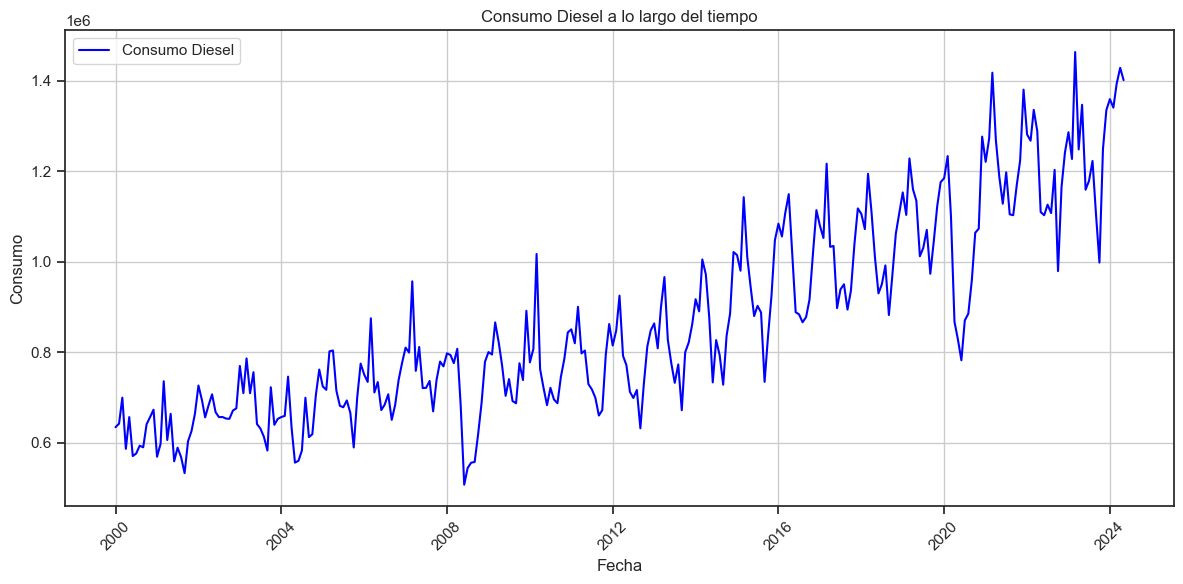

✅ Gráfica de Consumo Diesel completada.
🟠 Graficando Importación Gasolina Regular...


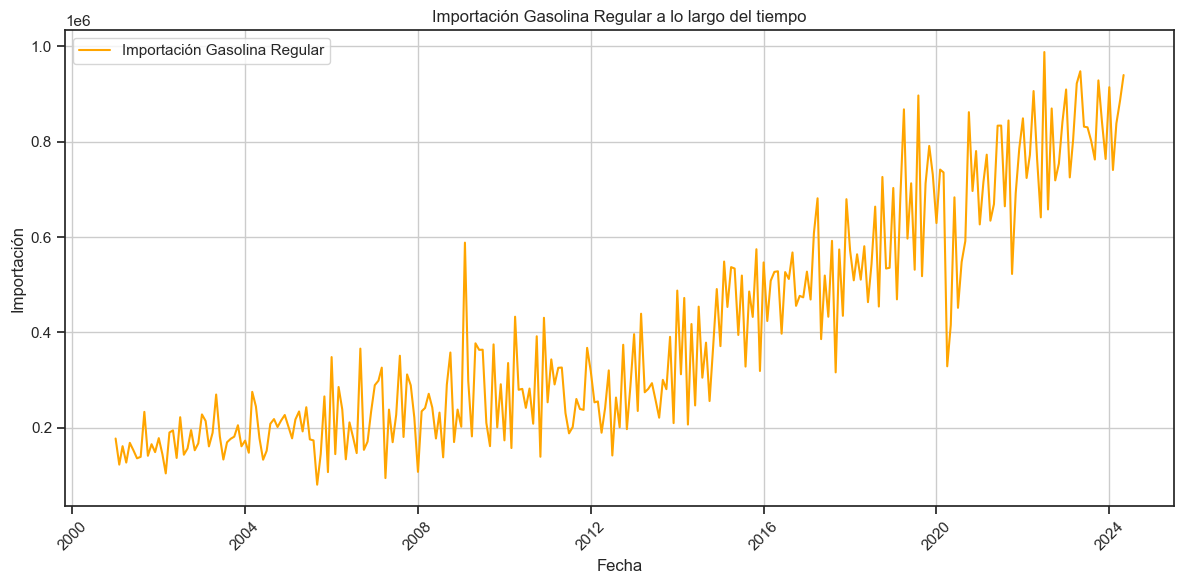

✅ Gráfica de Importación Gasolina Regular completada.
🟢 Graficando Precios Super...


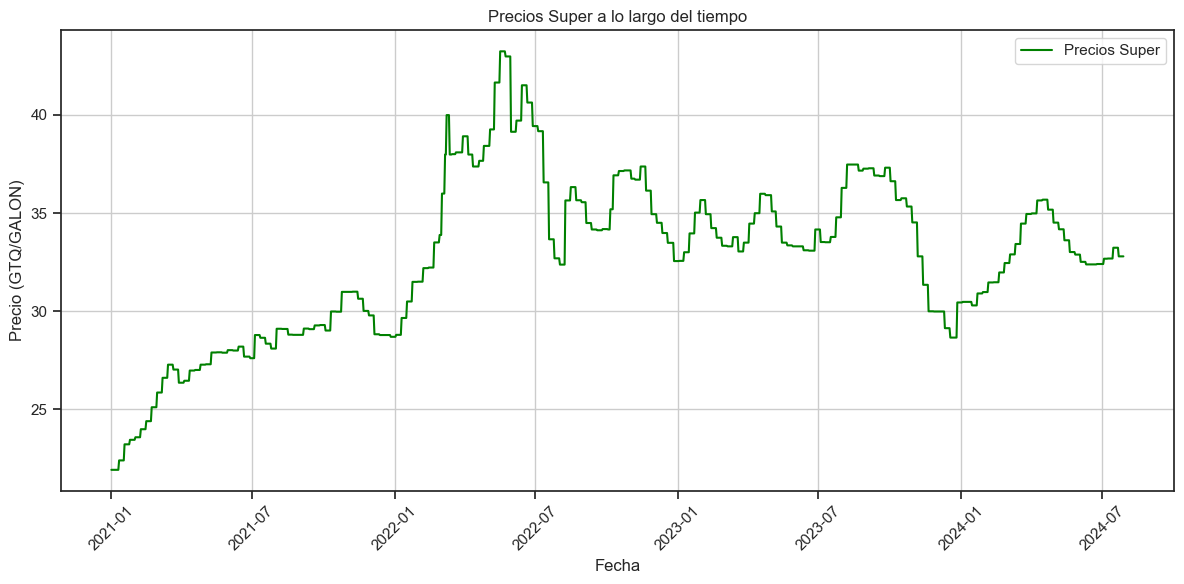

✅ Gráfica de Precios Super completada.


In [15]:
def plotTimeSeries(consumoDiesel, importacionRegular, preciosSuper):
    print("📈 Iniciando la visualización de series de tiempo...")
    
    # Grafica Consumo Diesel
    plt.figure(figsize=(12, 6))
    print("🔵 Graficando Consumo Diesel...")
    plt.plot(consumoDiesel.index, consumoDiesel['Diesel'], label='Consumo Diesel', color='blue')
    plt.title('Consumo Diesel a lo largo del tiempo')
    plt.xlabel('Fecha')
    plt.ylabel('Consumo')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print("✅ Gráfica de Consumo Diesel completada.")

    # Grafica Importación Gasolina Regular
    plt.figure(figsize=(12, 6))
    print("🟠 Graficando Importación Gasolina Regular...")
    plt.plot(importacionRegular.index, importacionRegular['Gasolina regular'], label='Importación Gasolina Regular', color='orange')
    plt.title('Importación Gasolina Regular a lo largo del tiempo')
    plt.xlabel('Fecha')
    plt.ylabel('Importación')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print("✅ Gráfica de Importación Gasolina Regular completada.")

    # Grafica Precios Super
    plt.figure(figsize=(12, 6))
    print("🟢 Graficando Precios Super...")
    plt.plot(preciosSuper.index, preciosSuper['Superior GTQ/GALON'], label='Precios Super', color='green')
    plt.title('Precios Super a lo largo del tiempo')
    plt.xlabel('Fecha')
    plt.ylabel('Precio (GTQ/GALON)')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print("✅ Gráfica de Precios Super completada.")

plotTimeSeries(serieConsumoDiesel, serieImportacionRegular, seriePreciosSuper)

📈 Diesel: Iniciando la descomposición de la serie de tiempo... 


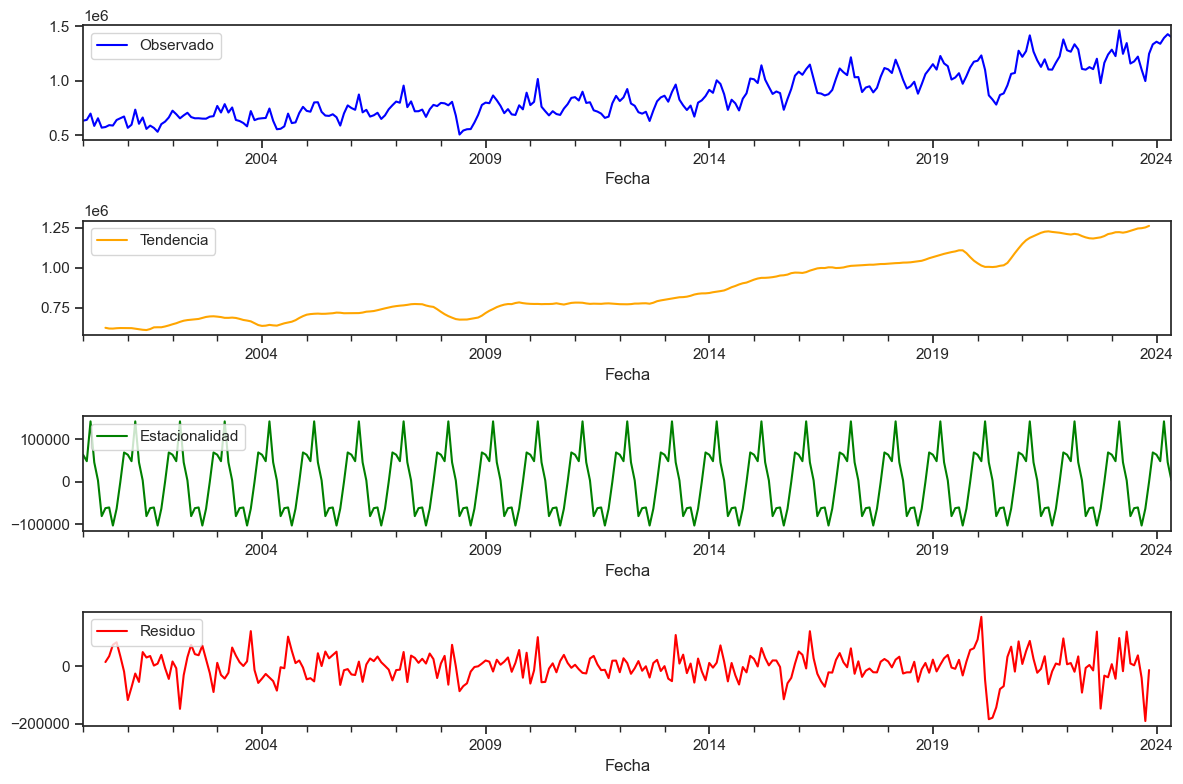

✅ Descomposición completada.
📈 Regular: Iniciando la descomposición de la serie de tiempo... 


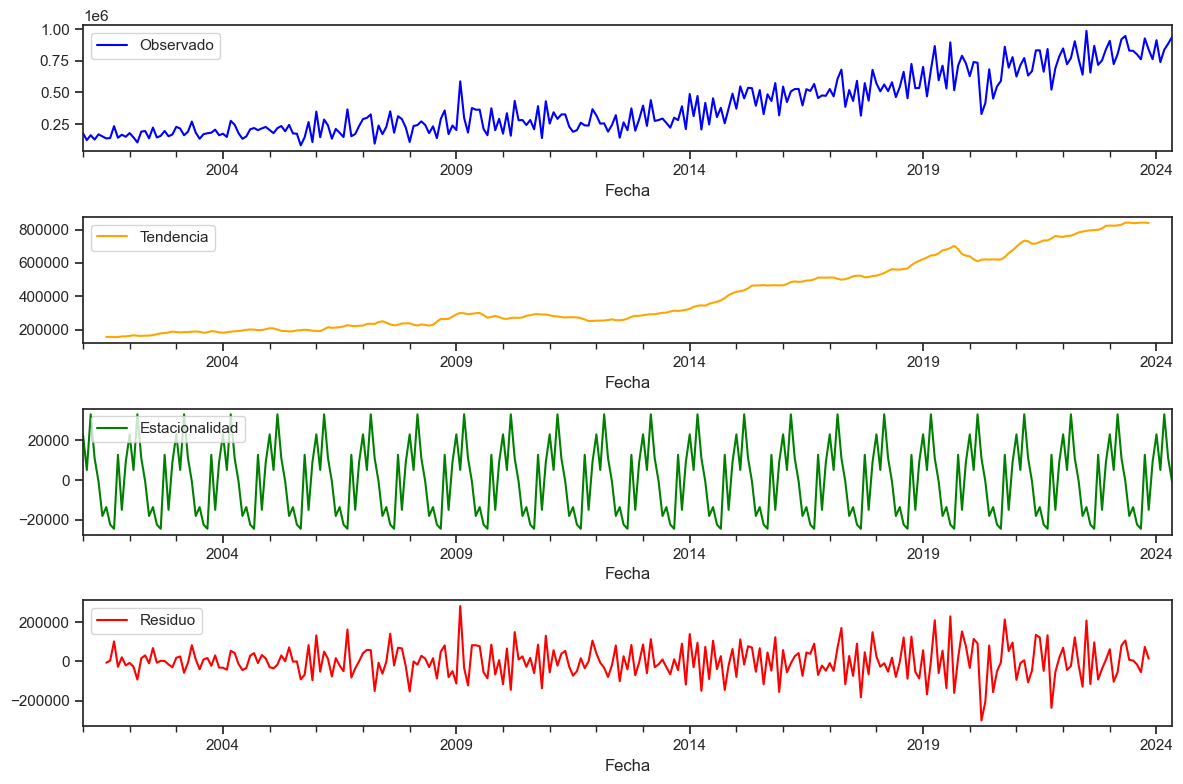

✅ Descomposición completada.
📈 Superior: Iniciando la descomposición de la serie de tiempo... 


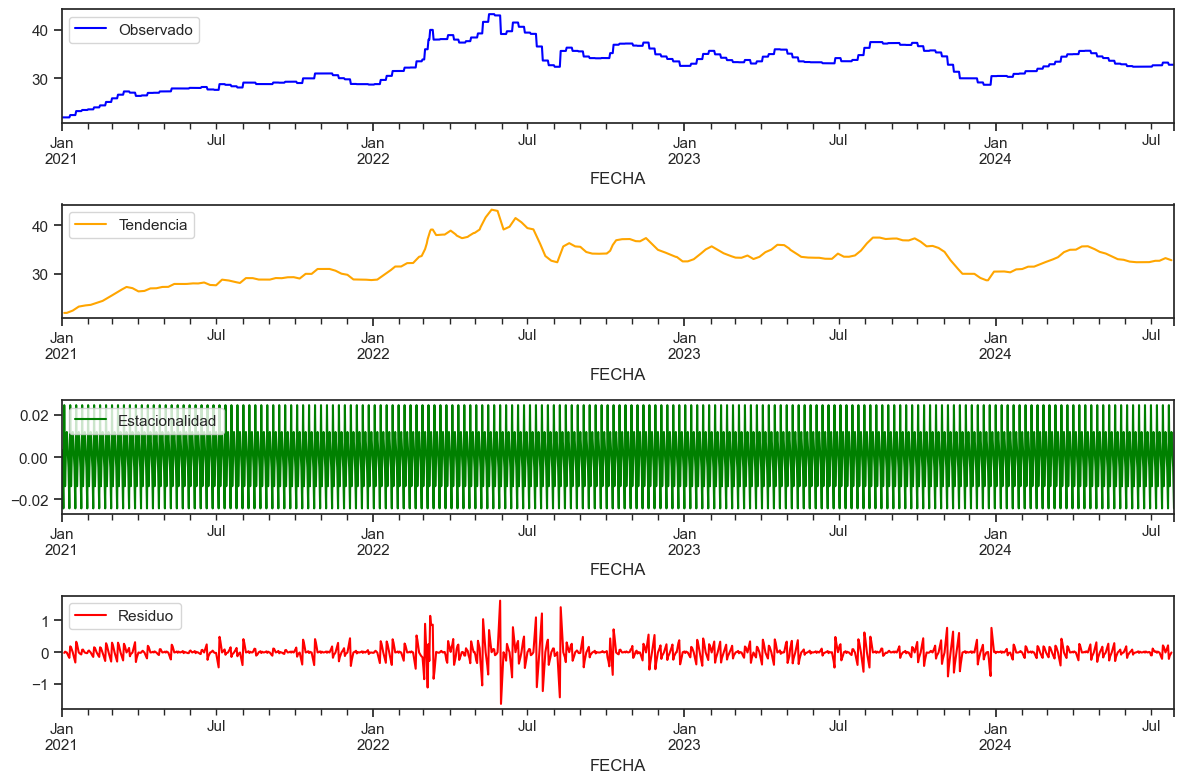

✅ Descomposición completada.


In [16]:
def descomponerSerieTiempo(serieTiempo, descripcion):
    print(f"📈 {descripcion}: Iniciando la descomposición de la serie de tiempo... ")
    
    # Descomposición de la serie
    descomposicion = sm.tsa.seasonal_decompose(serieTiempo, model='additive')
    
    # Graficar los componentes
    plt.figure(figsize=(12, 8))
    descomposicion.observed.plot(ax=plt.subplot(411), label='Observado', color='blue')
    plt.legend(loc='upper left')
    
    descomposicion.trend.plot(ax=plt.subplot(412), label='Tendencia', color='orange')
    plt.legend(loc='upper left')

    descomposicion.seasonal.plot(ax=plt.subplot(413), label='Estacionalidad', color='green')
    plt.legend(loc='upper left')

    descomposicion.resid.plot(ax=plt.subplot(414), label='Residuo', color='red')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()
    
    print("✅ Descomposición completada.")

descomponerSerieTiempo(serieConsumoDiesel['Diesel'], 'Diesel')
descomponerSerieTiempo(serieImportacionRegular['Gasolina regular'], 'Regular')
descomponerSerieTiempo(seriePreciosSuper['Superior GTQ/GALON'], 'Superior')


- 🔵 Consumo de diesel:
Se puede observar que lo largo del tiempo, cuenta con una tendencia general ascendente con alguna fluctuaciones durante ciertos años como el 2008, 2012, 2016 y 2020. Seguramente este último debido a la pandemia de COVID-19. Además, se puede observar que cuenta con algunos patrones de estacionalidad con variaciones relativamente regulares en ciertos periodos. 

- 🟠 Importacion de gasolina regular:
Al igual que la tendencia del diesel, cuenta con una tendencia creciente en el tiempo y con la característica que es más pronunciada a partir de 2008. Respecto a la estacionalidad de la serie, se puede mencionar que existe mayor variabilidad y picos significativos en los mismos años mencionados del diesel. Estas variaciones se pueden atribuir a cambios en politicas de importacion, eventos fuera de lo ordinario como la pandemia, entre otros.

- 🟢 Precios diarios promedio de super:
A diferencia de las últimas dos series, los precios no muestran una tendencia muy clara a largo plazo. Aún asi, cabe desctacar que existen periodos de aumento y disminución significativos. Hablando de la estacinalidad de la serie, no se logra apreciar una estacionalidad clara pero sí es evidente que existen picos y valles notables. Entre 2021 y 2022 se observa que existio un aumento considerable de los precios seguidos de una disminución y varias flucturaciones. Estos cambios siempre se atribuyen a eventos como el COVID-19 o conflictos geopolíticos que afecta la producción y oferta del petróleo. 

### ✍️ Transformaciones

Se puede observar que todos los diagramas cuentan con un lento decaimiento y las autocorrelaciones son positivas. Esto nos indica que existe autocorrelación significativa y las series no son estacionarias. Además, analizando la autocorrelacion parcial, se puede observar que existe significancia entre el primer y segundo retardo principalmente.

📈 Gráfico de Autocorrelación y Autocorrelación Parcial para: Diesel


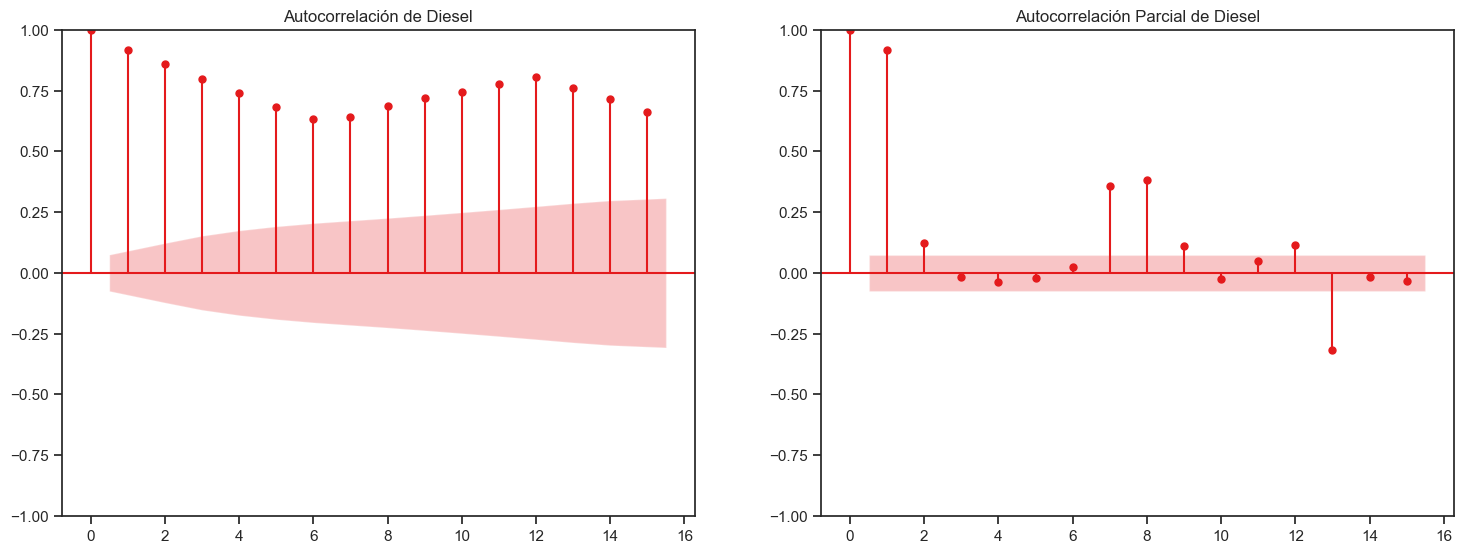

📈 Gráfico de Autocorrelación y Autocorrelación Parcial para: Regular


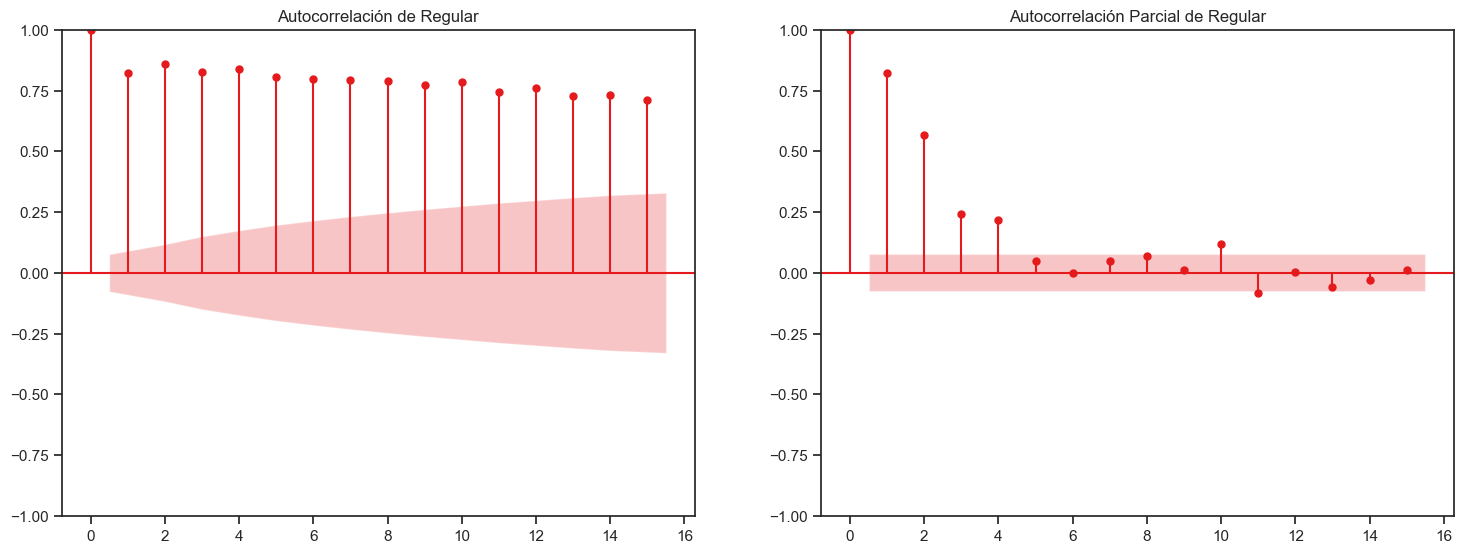

📈 Gráfico de Autocorrelación y Autocorrelación Parcial para: Superior


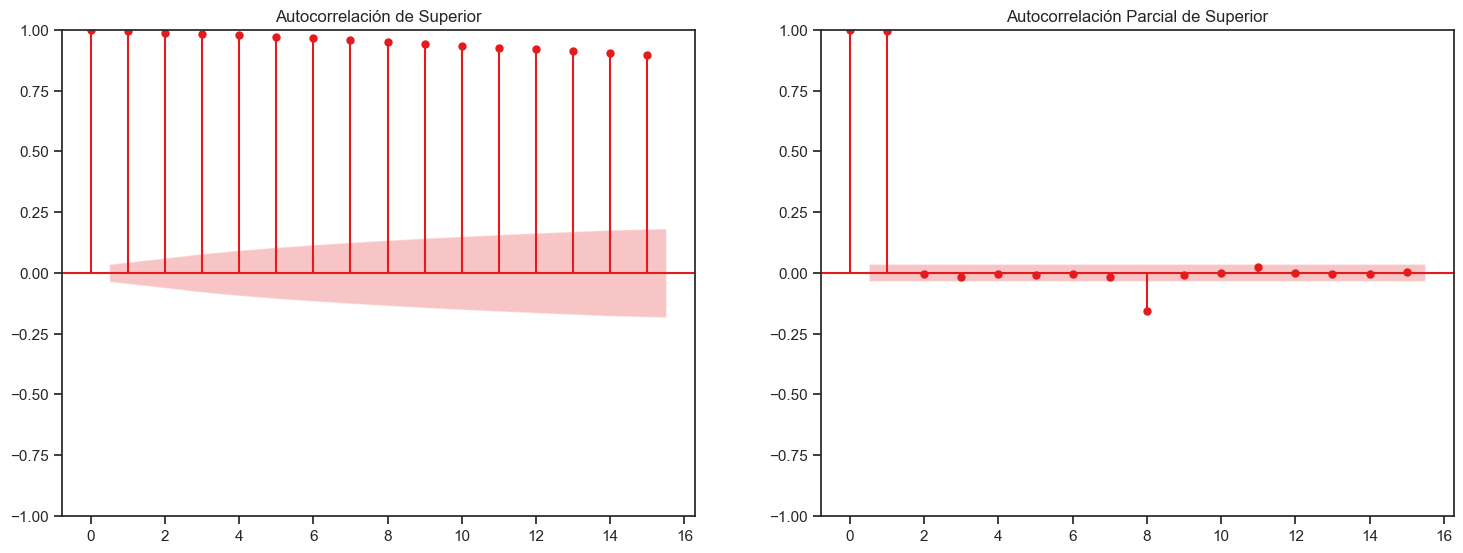

In [49]:
def graficarACF_PACF(serieTiempo, descripcion):
    print(f"📈 Gráfico de Autocorrelación y Autocorrelación Parcial para: {descripcion}")
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    plot_acf(serieTiempo, lags=15, alpha=0.2, ax=axes[0])
    axes[0].set_title(f'Autocorrelación de {descripcion}')
    
    plot_pacf(serieTiempo, lags=15, alpha=0.2, ax=axes[1])
    axes[1].set_title(f'Autocorrelación Parcial de {descripcion}')
    
    plt.show()

# Ejemplos de uso:
graficarACF_PACF(serieConsumoDiesel['Diesel'], 'Diesel')
graficarACF_PACF(serieImportacionRegular['Gasolina regular'], 'Regular')
graficarACF_PACF(seriePreciosSuper['Superior GTQ/GALON'], 'Superior')


De la prueba de Dickey-Fuller Aumentada se puede observar que tanto para diesel y gasolina regular, sus series no son estacionarios debido al p-valor determinado, por lo que se puede considerar realizar aplicar diferenciación antes de aplicar los modelos de series temporales. Por otra parte, respecto a la serie de gasolina superior, pareciera ser estacionaria por lo que se podría modelar directamente sin necesidad de diferenciación. 

Las trasnformaciones que podrían ser requeridas serían aplicar diferenciaciones para las series *Diesel* y *Regular* o transformaciones logaritmicas para estabilizar varianza. Además, si se quisiera mejorar un poco la serie de *Super* se podría considerar aplicar alguna transformación para ver si mejora el rendimiento.

In [18]:
def pruebaDickeyFuller(serieTiempo, descripcion):
    print(f"📊 Prueba de Dickey-Fuller Aumentada para: {descripcion}")
    resultado = adfuller(serieTiempo)
    print(f'Estadístico ADF: {resultado[0]}')
    print(f'p-valor: {resultado[1]}')
    print('Valores críticos:')
    for key, value in resultado[4].items():
        print(f'  {key}: {value}')
    print('-----------------------------------------------------')
    return resultado[1] 

print('-----------------------------------------------------')
pruebaDickeyFuller(serieConsumoDiesel['Diesel'], 'Diesel')
pruebaDickeyFuller(serieImportacionRegular['Gasolina regular'], 'Regular')
pruebaDickeyFuller(seriePreciosSuper['Superior GTQ/GALON'], 'Superior')

-----------------------------------------------------
📊 Prueba de Dickey-Fuller Aumentada para: Diesel
Estadístico ADF: 0.14523982117810716
p-valor: 0.9690175028779467
Valores críticos:
  1%: -3.453922368485787
  5%: -2.871918329081633
  10%: -2.5723001147959184
-----------------------------------------------------
📊 Prueba de Dickey-Fuller Aumentada para: Regular
Estadístico ADF: 0.8288289928204905
p-valor: 0.992087554110633
Valores críticos:
  1%: -3.4547128138328875
  5%: -2.8722649771800155
  10%: -2.5724850011573914
-----------------------------------------------------
📊 Prueba de Dickey-Fuller Aumentada para: Superior
Estadístico ADF: -2.9399220843939617
p-valor: 0.040898674582741115
Valores críticos:
  1%: -3.435401880796999
  5%: -2.863770985550096
  10%: -2.567957791647768
-----------------------------------------------------


0.040898674582741115

En esta parte se realizan una serie de funciones que buscan automatizar el proceso de transformación de series para mejorar su rendimiento y evitar la no estacionalidad. Dentro de estas se mencionan la trasnformacion logaritmica y la diferenciación. Cabe destacar que de acuerdo con los resultados anteriores, si no se logra estabilizar tanto en media como en varianza, se decidieron los valores p=1, d=1 y q=1 para ser utilizados en los modelos requeridos. 

In [42]:
def detectar_valores_invalidos(serieTemporal, descripcion):
    serieTemporal = pd.to_numeric(serieTemporal, errors='coerce')  # Convertir a numérico y forzar NaN si hay errores
    n_nan = serieTemporal.isna().sum()
    n_no_positivos = (serieTemporal <= 0).sum()

    print(f"🔍 Detección de valores inválidos en la serie: {descripcion}")
    print(f"  Valores NaN: {n_nan}")
    print(f"  Valores no positivos: {n_no_positivos}")
    
    serieTemporal_sin_nan = serieTemporal.dropna()
    print(f"  Serie temporal sin valores NaN tiene {len(serieTemporal_sin_nan)} elementos.")
    
    return serieTemporal_sin_nan, n_nan, n_no_positivos

def varianza_estable(serieTemporal):
    n = len(serieTemporal)
    partes = np.array_split(serieTemporal, 3)
    varianzas = [np.var(parte) for parte in partes]
    return np.allclose(varianzas[0], varianzas[1], rtol=0.1) and np.allclose(varianzas[1], varianzas[2], rtol=0.1)

def aplicar_transformacion_logaritmica(serieTemporal):
    if (serieTemporal > 0).all():
        return np.log(serieTemporal)
    else:
        print("⚠️ La serie contiene valores no positivos, no se puede aplicar la transformación logarítmica.")
        return serieTemporal

def analizar_y_transformar_serie(serieTemporal, descripcion):
    print(f"🔍 Analizando la serie: {descripcion}")
    
    serieTemporal, n_nan, n_no_positivos = detectar_valores_invalidos(serieTemporal, descripcion)
    
    estacionaria = False
    intentos = 0
    max_intentos = 10

    serieTemporal = aplicar_transformacion_logaritmica(serieTemporal)
    
    while not estacionaria and intentos < max_intentos:
        intentos += 1
        p_valor = pruebaDickeyFuller(serieTemporal, descripcion)
        if p_valor < 0.05:
            if varianza_estable(serieTemporal):
                estacionaria = True
                print(f"✅ La serie {descripcion} es estacionaria en media y varianza.")
                break
            else:
                print(f"❌ La varianza no es estable en la serie {descripcion}.")
        else:
            print(f"❌ La serie {descripcion} no es estacionaria (p-valor: {p_valor}).")
        
        serieTemporal = serieTemporal.diff().dropna()
        print(f"🔄 Aplicando diferenciación a {descripcion}. Intento {intentos}.")
    
    if not estacionaria:
        print(f"⚠️ No se pudo hacer la serie {descripcion} estacionaria después de {max_intentos} intentos.")
        print("📈 Utilizando un modelo ARIMA para tratar con la no estacionariedad.")
        modelo_arima = ARIMA(serieTemporal, order=(1, 1, 1))
        modelo_arima_fit = modelo_arima.fit()
        print(modelo_arima_fit.summary())
    else:
        modelo_arima_fit = None
        
    return serieTemporal, modelo_arima_fit

# Asegúrate de que estas variables estén definidas correctamente
# Reemplaza con tus series temporales reales
serieTemporalD, modelo_arima_diesel = analizar_y_transformar_serie(serieConsumoDiesel['Diesel'], 'Diesel')
# print("--------------------------------------------------------------------------------------------------------")
serieTemporalR, modelo_arima_regular = analizar_y_transformar_serie(serieImportacionRegular['Gasolina regular'], 'Regular')
# print("--------------------------------------------------------------------------------------------------------")
serieTemporalS, modelo_arima_super = analizar_y_transformar_serie(seriePreciosSuper['Superior GTQ/GALON'], 'Superior')


🔍 Analizando la serie: Diesel
🔍 Detección de valores inválidos en la serie: Diesel
  Valores NaN: 0
  Valores no positivos: 0
  Serie temporal sin valores NaN tiene 293 elementos.
Prueba Dickey-Fuller para Diesel: p-valor = 0.901557753919378
❌ La serie Diesel no es estacionaria (p-valor: 0.901557753919378).
🔄 Aplicando diferenciación a Diesel. Intento 1.
Prueba Dickey-Fuller para Diesel: p-valor = 7.851113111171977e-10
❌ La varianza no es estable en la serie Diesel.
🔄 Aplicando diferenciación a Diesel. Intento 2.
Prueba Dickey-Fuller para Diesel: p-valor = 3.1021697475811376e-15
❌ La varianza no es estable en la serie Diesel.
🔄 Aplicando diferenciación a Diesel. Intento 3.
Prueba Dickey-Fuller para Diesel: p-valor = 7.339914914662219e-25
❌ La varianza no es estable en la serie Diesel.
🔄 Aplicando diferenciación a Diesel. Intento 4.
Prueba Dickey-Fuller para Diesel: p-valor = 3.85887345410522e-27
❌ La varianza no es estable en la serie Diesel.
🔄 Aplicando diferenciación a Diesel. Intent

Los resultados nos indican de esta forma de automatizar la busqueda de buenos parametros p, d y q resultó efectiva en todas las series. Esto basados en los resultados de AIC y BIC obtenidos. Aun así, se decidió implementar el modelo auto_arima para comparar la diferencia que existen entre estos métodos.

In [50]:
serie_diesel = serieConsumoDiesel['Diesel']

# Ajustar el modelo ARIMA automáticamente
modelo_auto = auto_arima(serie_diesel,
                          seasonal=False,  # Si no es estacional
                          stepwise=True,   # Si utilizar pasos para encontrar el mejor modelo
                          trace=True)      # Mostrar el progreso

# Resumen del modelo
print(modelo_auto.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7447.955, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7440.658, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7440.979, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7446.248, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7442.638, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7442.627, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7444.623, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=7439.163, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=7441.126, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=7441.116, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=7439.504, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=7443.087, Time=0.06 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.677 seconds
                           

In [51]:
serie_regular = serieImportacionRegular['Gasolina regular']

# Ajustar el modelo ARIMA automáticamente
modelo_auto = auto_arima(serie_regular,
                          seasonal=False,  # Si no es estacional
                          stepwise=True,   # Si utilizar pasos para encontrar el mejor modelo
                          trace=True)      # Mostrar el progreso

# Resumen del modelo
print(modelo_auto.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7193.005, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7412.355, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7264.099, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7230.431, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7410.471, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7201.550, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7200.752, Time=0.06 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=7193.700, Time=0.14 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=7195.543, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7198.250, Time=0.04 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=7200.602, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=7199.638, Time=0.06 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=7189.517, Time=0.34 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : 

In [52]:
serie_super = seriePreciosSuper['Superior GTQ/GALON']

# Ajustar el modelo ARIMA automáticamente
modelo_auto_super = auto_arima(serie_super,
                          seasonal=False,  # Si no es estacional
                          stepwise=True,   # Si utilizar pasos para encontrar el mejor modelo
                          trace=True)      # Mostrar el progreso

# Resumen del modelo
print(modelo_auto.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=773.104, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=774.698, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=776.697, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=776.697, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=773.556, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=779.616, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=770.964, Time=0.69 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=778.676, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=777.650, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=781.620, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=779.621, Time=0.08 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=771.049, Time=0.99 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=769.409, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=769.647, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=776.4

De esta manera se comprueba que la diferencia es significativamente alta, ya que entre los modelos propuestos anteriormente y los generados con el auto arima, existe una diferencia en terminos de AIC y de BIC de 3000 aproximadamente en todos los modelos. 

Además, con fines de investigación y de verificar cómo las predicciones automatizadas con librerías funcionan, se decidió utilizar la librería de prophet de Facebook para evaluar su rendimiento.

17:20:53 - cmdstanpy - INFO - Chain [1] start processing
17:20:53 - cmdstanpy - INFO - Chain [1] done processing


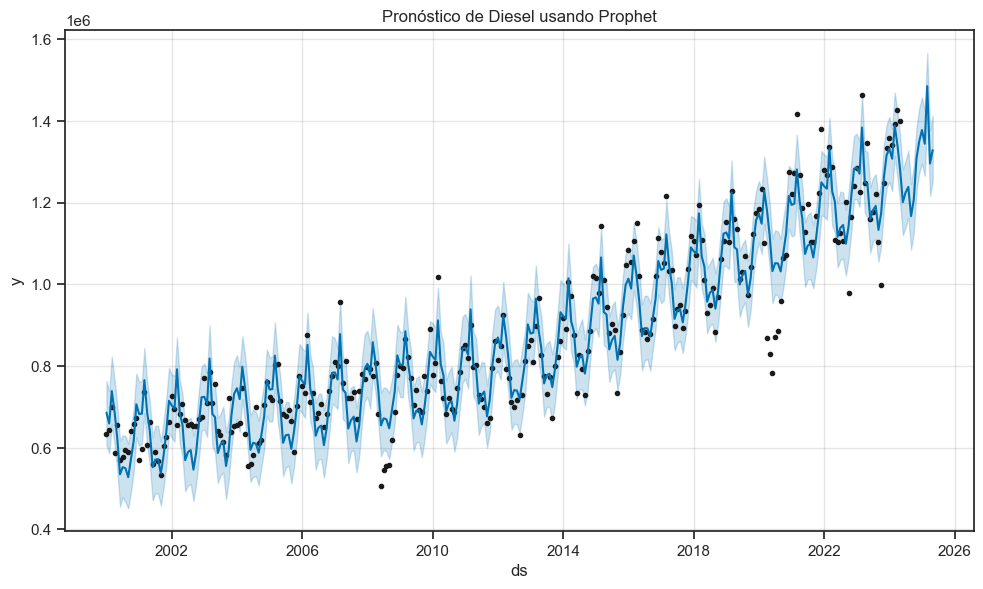

17:20:53 - cmdstanpy - INFO - Chain [1] start processing
17:20:53 - cmdstanpy - INFO - Chain [1] done processing


AIC para Diesel: 6480.70112158008
BIC para Diesel: 6506.4623298432


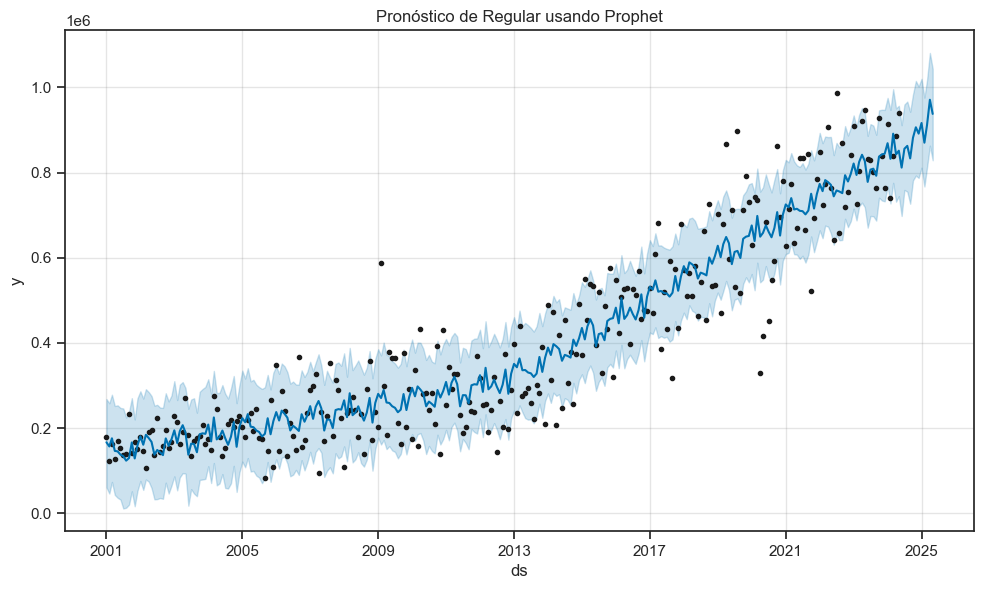

17:20:54 - cmdstanpy - INFO - Chain [1] start processing


AIC para Regular: 6387.850788531148
BIC para Regular: 6413.319271216485


17:20:54 - cmdstanpy - INFO - Chain [1] done processing


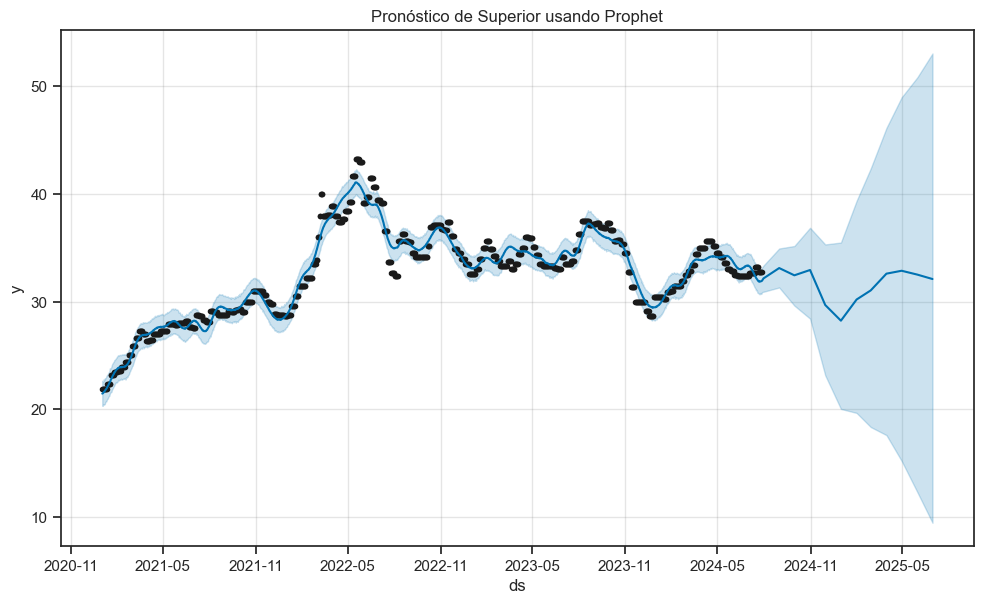

AIC para Superior: -279.6520722629985
BIC para Superior: -243.43436402470093


In [53]:
def calcular_aic_bic(y_true, y_pred, num_params):
    # Calcular log-verosimilitud
    residuals = y_true - y_pred
    n = len(y_true)
    log_likelihood = -0.5 * (n * np.log(np.sum(residuals**2) / n))
    
    # Calcular AIC y BIC
    aic = 2 * num_params - 2 * log_likelihood
    bic = np.log(n) * num_params - 2 * log_likelihood
    
    return aic, bic

def entrenarProphet(serieTiempo, nombre_variable):
    # Preparar los datos
    df_prophet = serieTiempo.reset_index()
    df_prophet.columns = ['ds', 'y']

    # Crear y ajustar el modelo Prophet
    modelo = Prophet()
    modelo.fit(df_prophet)

    # Hacer predicciones
    futuro = modelo.make_future_dataframe(periods=12, freq='M')  # Cambia el número y la frecuencia según tus necesidades
    pronostico = modelo.predict(futuro)

    # Graficar resultados
    modelo.plot(pronostico)
    plt.title(f'Pronóstico de {nombre_variable} usando Prophet')
    plt.show()

    # Calcular AIC y BIC
    y_true = df_prophet['y'].values
    y_pred = pronostico['yhat'][:len(df_prophet)].values
    num_params = len(modelo.params)  # Número de parámetros del modelo
    
    aic, bic = calcular_aic_bic(y_true, y_pred, num_params)
    
    print(f"AIC para {nombre_variable}: {aic}")
    print(f"BIC para {nombre_variable}: {bic}")

# Entrenar el modelo para el Diesel
entrenarProphet(serieConsumoDiesel[['Diesel']], 'Diesel')
entrenarProphet(serieImportacionRegular[['Gasolina regular']], 'Regular')
entrenarProphet(seriePreciosSuper[['Superior GTQ/GALON']], 'Superior')

Por una parte, se logran realizar predicciones coherentes como las de diesel y gasolina regular, pero por otra parte, es evidente que las predicciones en algunos casos no cuentan con ningún sentido dado que puede ocurrir cuaquier evento debido al rango que muestran. El ejemplo más evidente es con la serie de precios promedio de la gasolina super. Aún así, es destacable la forma en la que se representan los puntos atípicos, evidenciando las épocas donde se vieron afectadas las series por acotecimientos globales como la pandemia o conflictos geopolíticos. 

Dejando lo anterior de lado, los valores de AIC y BIC son significativamente mejores que los de auto arima hablando de las series de Diesel y de Gasolina regular, sin embargo, siguen siendo mejores los que se determinaron manualmente. Por otra parte, resulta interesante la predicción de gasolina superior dado que los valores de AIC y BIC son los mejores obtenidos de todos los métodos implementados.

### Predicciones ultimos 3 años

RMSE: 9.34
MAE: 8.38
MAPE: 0.47


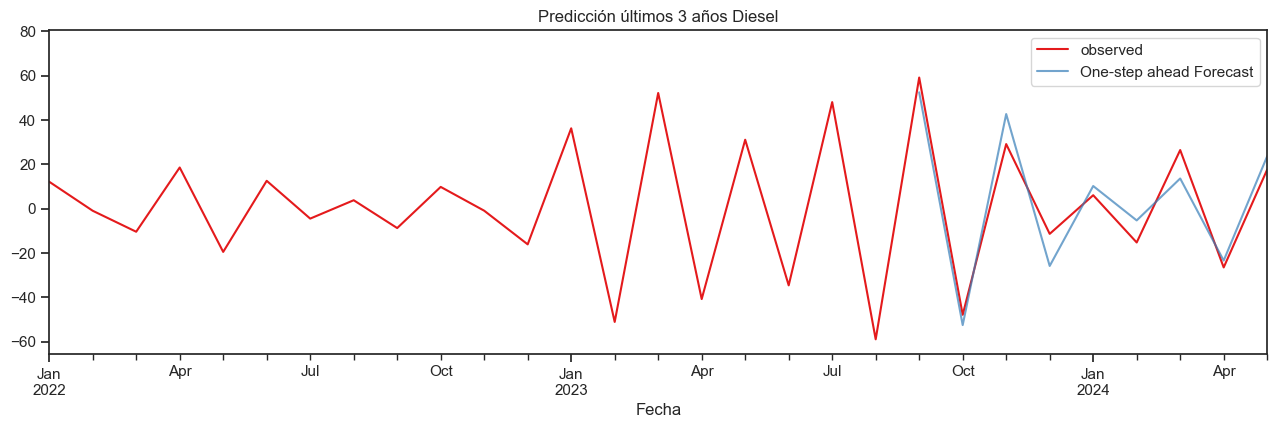

In [94]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


ultimos_3_anos = serieTemporalD['2022-01-01':'2024-12-31']

# Dividir los datos en 70% entrenamiento y 30% prueba
n = len(ultimos_3_anos)
train_size = int(n * 0.7)
train, test = ultimos_3_anos[:train_size], ultimos_3_anos[train_size:]

pred = modelo_arima_diesel.get_prediction(start=test.index[0], end=test.index[-1])

pred_ci = pred.conf_int()
ax = serieTemporalD['2022':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between( pred_ci.iloc[:,0],
                pred_ci.iloc[:,1], color='k', alpha=.2)

# Evaluar el modelo
rmse = np.sqrt(mean_squared_error(test, pred.predicted_mean))
mae = mean_absolute_error(test, pred.predicted_mean)
mape = mean_absolute_percentage_error(test, pred.predicted_mean)

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}')

plt.legend()
plt.title(f'Predicción últimos 3 años Diesel')
plt.show()


Para la serie de tiempo de consumo de diesel se tomo informacion de los últimos 3 años, donde en la parte entre septiembre y abril de 2024 se realizó una predicción y ver que tanto se asemeajaba a la información real de la serie de tiempo. En ella podemo ver que se asemeja bastante visualmente, podemos ver que el RMSE y el MAE son realtivamente bajos indicandonos una buena prediccion. Ahora con el MAPE el del 47% aproximadamente por lo que se puede decir que la producción es razonable.

RMSE: 17.56
MAE: 13.31
MAPE: 1.36


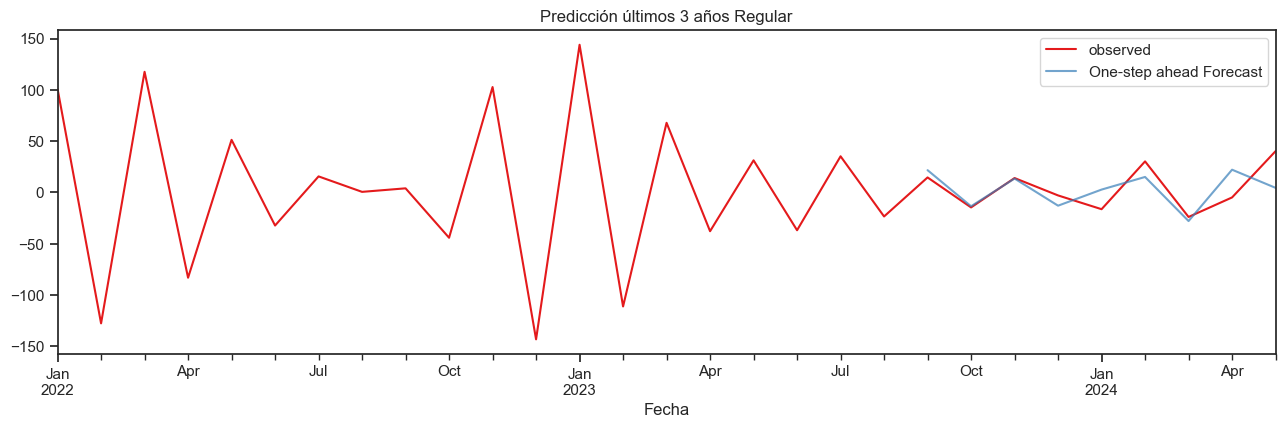

In [95]:
ultimos_3_anos = serieTemporalR['2022-01-01':'2024-12-31']

# Dividir los datos en 70% entrenamiento y 30% prueba
n = len(ultimos_3_anos)
train_size = int(n * 0.7)
train, test = ultimos_3_anos[:train_size], ultimos_3_anos[train_size:]

pred = modelo_arima_regular.get_prediction(start=test.index[0], end=test.index[-1])

pred_ci = pred.conf_int()
ax = serieTemporalR['2022':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between( pred_ci.iloc[:,0],
                pred_ci.iloc[:,1], color='k', alpha=.2)

# Evaluar el modelo
rmse = np.sqrt(mean_squared_error(test, pred.predicted_mean))
mae = mean_absolute_error(test, pred.predicted_mean)
mape = mean_absolute_percentage_error(test, pred.predicted_mean)

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}')

plt.legend()
plt.title(f'Predicción últimos 3 años Regular')
plt.show()

pred

Para esta predicción podemos ver en la gráfica que que inicia alineada a los datos reales, sin embargo se desalinea en las siguientes partes. El RMSE y el MAE son relativamente bajos aunque más altos que la anterior, sin embargo el MAPE es casi del 136% por lo que indica una predicción bastante pobre.

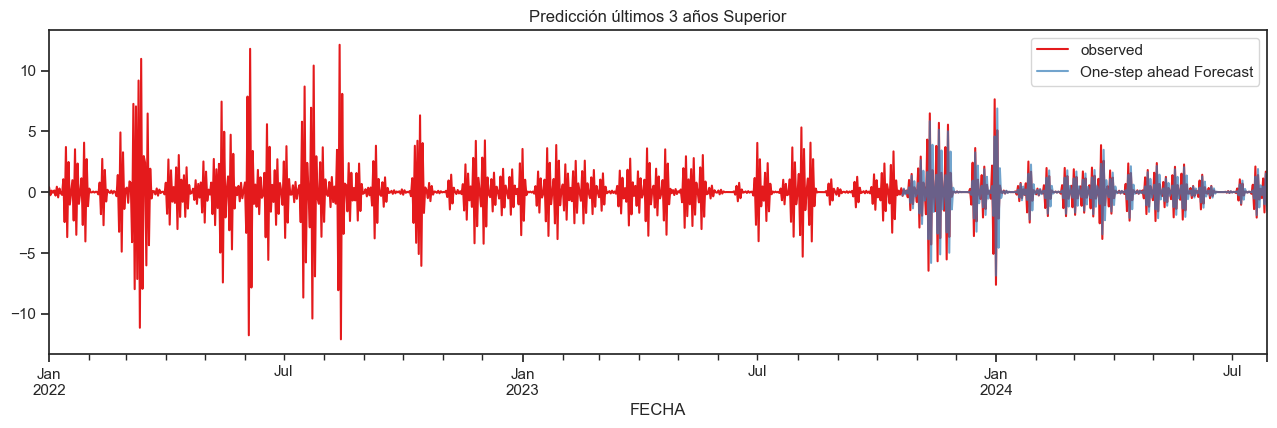

In [38]:
ultimos_3_anos = serieTemporalS['2022-01-01':'2024-12-31']

# Dividir los datos en 70% entrenamiento y 30% prueba
n = len(ultimos_3_anos)
train_size = int(n * 0.7)
train, test = ultimos_3_anos[:train_size], ultimos_3_anos[train_size:]

pred = modelo_arima_super.get_prediction(start=test.index[0], end=test.index[-1])

pred_ci = pred.conf_int()
ax = serieTemporalS['2022':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between( pred_ci.iloc[:,0],
                pred_ci.iloc[:,1], color='k', alpha=.2)

plt.legend()
plt.title(f'Predicción últimos 3 años Superior')
plt.show()

pred

### Prediccion para 2024

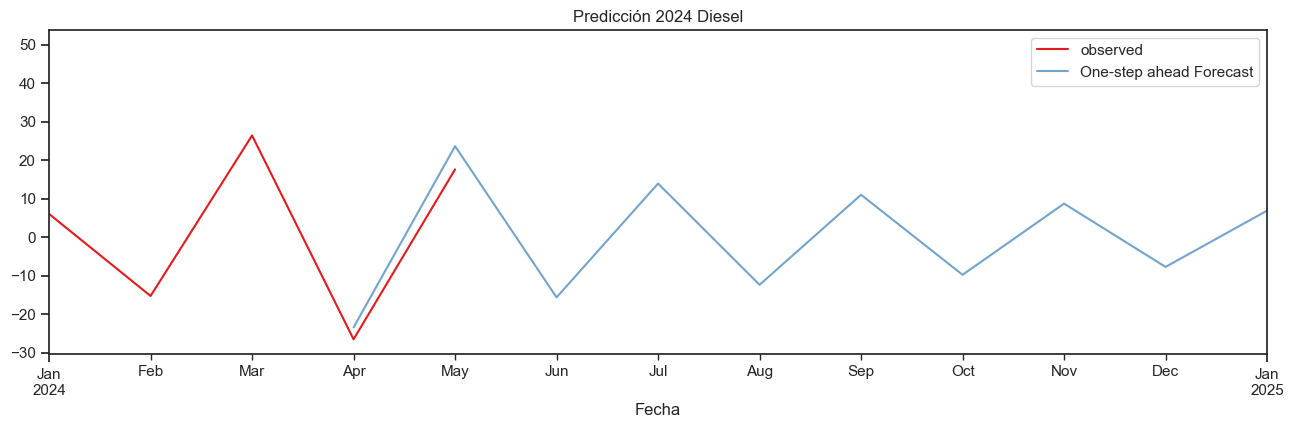

In [39]:
actual_year = serieTemporalD['2024-01-01':'2024-12-31']

# Dividir los datos en 70% entrenamiento y 30% prueba
n = len(actual_year)
train_size = int(n * 0.7)
train, test = actual_year[:train_size], actual_year[train_size:]

pred = modelo_arima_diesel.get_prediction(start=test.index[0], end='2024-12-31')

pred_ci = pred.conf_int()
ax = serieTemporalD['2024':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between( pred_ci.iloc[:,0],
                pred_ci.iloc[:,1], color='k', alpha=.2)

plt.legend()
plt.title(f'Predicción 2024 Diesel')
plt.show()

pred

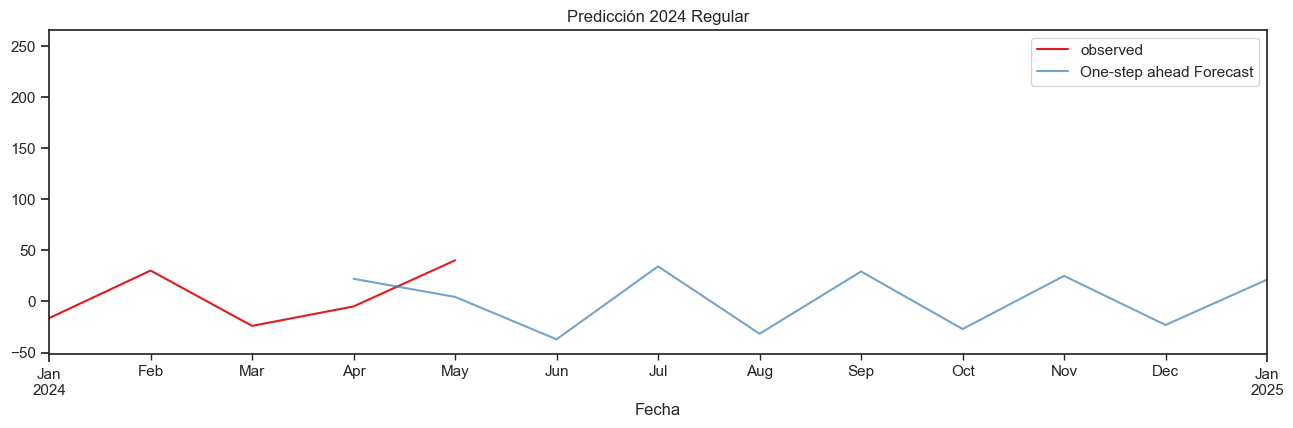

In [40]:
actual_year = serieTemporalR['2024-01-01':'2024-12-31']

# Dividir los datos en 70% entrenamiento y 30% prueba
n = len(actual_year)
train_size = int(n * 0.7)
train, test = actual_year[:train_size], actual_year[train_size:]

pred = modelo_arima_regular.get_prediction(start=test.index[0], end='2024-12-31')

pred_ci = pred.conf_int()
ax = serieTemporalR['2024':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between( pred_ci.iloc[:,0],
                pred_ci.iloc[:,1], color='k', alpha=.2)

plt.title(f'Predicción 2024 Regular')
plt.legend()
plt.show()

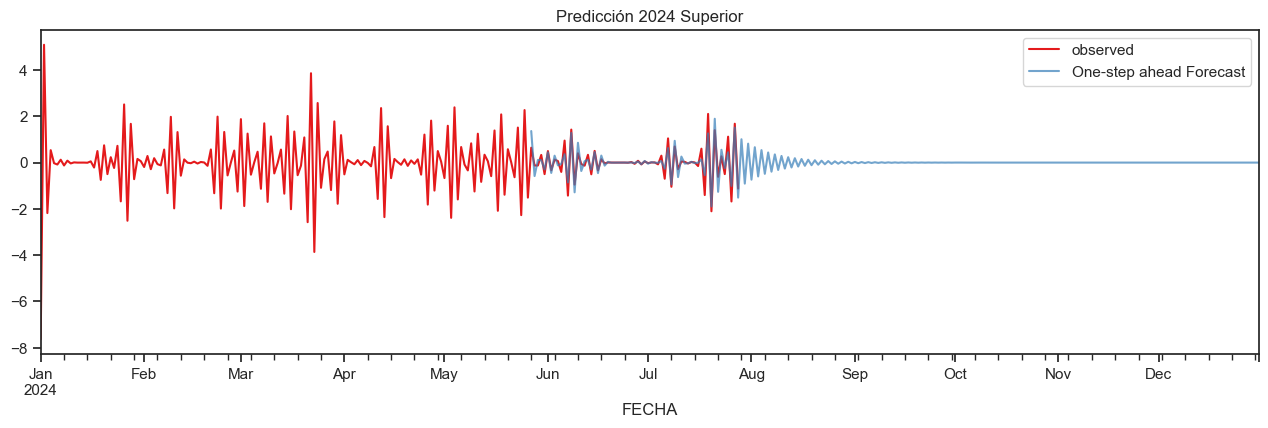

In [41]:
actual_year = serieTemporalS['2024-01-01':'2024-12-31']

# Dividir los datos en 70% entrenamiento y 30% prueba
n = len(actual_year)
train_size = int(n * 0.7)
train, test = actual_year[:train_size], actual_year[train_size:]

pred = modelo_arima_super.get_prediction(start=test.index[0], end='2024-12-31')

pred_ci = pred.conf_int()
ax = serieTemporalS['2024':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between( pred_ci.iloc[:,0],
                pred_ci.iloc[:,1], color='k', alpha=.2)

plt.legend()
plt.title(f'Predicción 2024 Superior')
plt.show()